In [1]:
import random
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values



# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
#!conda install -c districtdatalabs yellowbrick
#from yellowbrick.cluster import KElbowVisualizer

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
data_chi=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Chicago/chicago_data.csv')
data_chi=data_chi.drop(columns='Unnamed: 0').reset_index(drop=True)

data_sf=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/San Francisco/sanfran_data.csv')
data_sf=data_sf.drop(columns='Unnamed: 0').reset_index(drop=True)

data_tor=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Toronto/data_tor.csv')
data_tor=data_tor.drop(columns='Unnamed: 0').reset_index(drop=True)

data_manh=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Manhattan/data_manh.csv')
data_manh=data_manh.drop(columns='Unnamed: 0').reset_index(drop=True)

In [3]:
data_master=[data_chi,data_sf,data_tor,data_manh]
col_join=['Neighborhood','City','Latitude','Longitude']
data_mast=pd.DataFrame(columns={"Borough","Neighborhood","Latitude","Longitude","City"})

# Function to rename columns and add borough data to all dataframes in list df
for i in range(len(data_master)):
    df1=data_master[i]
    cols=df1.columns
    df1=df1.fillna(value=cols[0],axis='columns')
    data_mast=data_mast.append(df1)
    i = i + 1
    
data_mast=data_mast.reset_index(drop=True)    
data_mast

Longitude                             Borough  \
0    -87.647127                           GREEKTOWN   
1    -87.629035                        PRINTERS ROW   
2    -87.620379                      MILLENIUM PARK   
3    -87.629068                     RUSH & DIVISION   
4    -87.624188                       STREETERVILLE   
5    -87.647447                            BOYSTOWN   
6    -87.672275  UKRAINIAN VILLAGE AND EAST VILLAGE   
7    -87.659101                        WRIGLEYVILLE   
8    -87.667865                       ANDERSONVILLE   
9    -87.620837                          GRANT PARK   
10   -87.653670                  SHEFFIELD & DEPAUL   
11   -87.684507  UKRAINIAN VILLAGE AND EAST VILLAGE   
12   -87.627104                          GOLD COAST   
13   -87.635186             ARMOUR SQUARE,CHINATOWN   
14   -87.639784                            OLD TOWN   
15   -87.596476                    CHATHAM,BURNSIDE   
16   -87.602389                     OAKLAND,KENWOOD   
17   -87.679861               WICKER PARK,WEST TOWN   
18   -87.798040                 MONTCLARE, GALEWOOD   
19   -87.679136                       UNITED CENTER   
20   -87.596184                     KENWOOD,OAKLAND   
21   -87.633222             ARMOUR SQUARE,CHINATOWN   
22   -87.792795                 MONTCLARE, GALEWOOD   
23   -87.632425                   BACK OF THE YARDS   
24   -87.672503         BRIGHTON PARK,MCKINLEY PARK   
25   -87.813781                         EDISON PARK   
26   -87.678785                            BUCKTOWN   
27   -87.724208          ARCHER HEIGHTS,WEST ELSDON   
28   -87.623892                     NEAR SOUTH SIDE   
29   -87.734740             BELMONT CRAIGIN,HERMOSA   
30   -87.586349         AVALON PARK,CALUMET HEIGHTS   
31   -87.593914                           HYDE PARK   
32   -87.617931                     WASHINGTON PARK   
33   -87.617860                         BRONZEVILLE   
34   -87.601686                            WOODLAWN   
35   -87.618678                         BRONZEVILLE   
36   -87.662320                           EDGEWATER   
37   -87.683835                        NORTH CENTER   
38   -87.641323                         RIVER NORTH   
39   -87.726363          ARCHER HEIGHTS,WEST ELSDON   
40   -87.696435            MARQUETTE PARK,GAGE PARK   
41   -87.648788                          BRIDGEPORT   
42   -87.579953                        JACKSON PARK   
43   -87.572718         AVALON PARK,CALUMET HEIGHTS   
44   -87.670167                         ROGERS PARK   
45   -87.711211                IRVING PARK,AVONDALE   
46   -87.616713                       MUSEUM CAMPUS   
47   -87.598255                             PULLMAN   
48   -87.707389                        LOGAN SQUARE   
49   -87.698861         BRIGHTON PARK,MCKINLEY PARK   
50   -87.667757                   LITTLE ITALY, UIC   
51   -87.690439                      LINCOLN SQUARE   
52   -87.721560              NORTH PARK,ALBANY PARK   
53   -87.695666            MARQUETTE PARK,GAGE PARK   
54   -87.617636                       STREETERVILLE   
55   -87.723583              NORTH PARK,ALBANY PARK   
56   -87.726929                           WEST LAWN   
57   -87.615970                    CHATHAM,BURNSIDE   
58   -87.648895         WASHINGTON HEIGHTS,ROSELAND   
59   -87.695013                          WEST RIDGE   
60   -87.674844                     LOWER WEST SIDE   
61   -87.765502              BELMONT CRAGIN,HERMOSA   
62   -87.658929                           WEST LOOP   
63   -87.771167                      JEFFERSON PARK   
64   -87.572783         SOUTH SHORE, GRAND CROSSING   
65   -87.715659                       GARFIELD PARK   
66   -87.675075                             BEVERLY   
67   -87.717219                      NORTH LAWNDALE   
68   -87.768511                      MIDWAY AIRPORT   
69   -87.716507                       HUMBOLDT PARK   
70   -87.669054         MOUNT GREENWOOD,MORGAN PARK   
71   -87.602849                           RIVE

In [4]:
#Reorganize Columns from joined tables
cols=data_mast.columns.tolist()
cols=[cols[2], cols[3], cols[0], cols[4], cols[1]]
data_mast=data_mast[cols]

In [5]:
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders
from arcgis.gis import GIS
from arcgis.geocoding import reverse_geocode
### Open ArcGIS Credentials
with open (r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\arcgiscreds.json') as f:
    data = json.load(f)
    arcgis_creds = {'url':data['url'],'Username':data['Username'],'Password':data['Password']}

gis = GIS(arcgis_creds['url'], arcgis_creds['Username'], arcgis_creds['Password'])
get_geocoders(gis)

[<Geocoder url:"https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer">]

In [6]:
data_mast=data_mast.sort_values('Neighborhood')
def find_zip(names, longitudes, latitudes, distance=500):
    
    zips_list=[]
    for name, lng, lat in zip(names, longitudes, latitudes):
        print(name)
            
        results = reverse_geocode([lng, lat],distance)['address']['Postal']
                 
        zips_list.append([(
            name,
            lng, 
            lat, 
            results)])
               
    
    coord_zips = pd.DataFrame([item for zip_list in zips_list for item in zip_list])
    coord_zips.columns = ['Neighborhood', 
                        'Longitude', 
                        'Latitude',  
                        'Postal Code']

    return(coord_zips)

In [7]:
nbrhd_zips = find_zip(names=data_mast['Neighborhood'],
                                   longitudes=data_mast['Longitude'],
                                   latitudes=data_mast['Latitude'])

Agincourt North
Agincourt South-Malvern West
Alamo Square
Albany Park
Alderwood
Andersonville
Annex
Anza Vista
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Austin
Avalon Park
Avondale
Balboa Terrace
Banbury-Don Mills
Bathurst Manor
Battery Park City
Bay Street Corridor
Bayview
Bayview Heights
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Belmont Cragin
Bendale
Bernal Heights
Beverly
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Boystown
Briar Hill-Belgravia
Bridgeport
Bridle Path-Sunnybrook-York Mills
Brighton Park
Broadview North
Brookhaven-Amesbury
Bucktown
Buena Vista Park/Ashbury Heights
Burnside
Cabbagetown-South St. James Town
Caledonia-Fairbank
Calumet Heights
Candlestick Point
Carnegie Hill
Casa Loma
Centennial Scarborough
Central Harlem
Central Richmond
Central Sunset
Central Waterfront/Dogpatch
Chatham
Chelsea
Chicago Lawn
Chinatown
Chinatown
Church-Yonge Corridor
Civic Center
Clairlea-Birchmount
Clanton Park
Clarendon Heights
Clear

In [384]:
nbrhd_zips.head()

Neighborhood   Longitude   Latitude Postal Code
0               Agincourt North  -79.266712  43.805441         M1S
1  Agincourt South-Malvern West  -79.265612  43.788658         M1S
2                  Alamo Square -122.434465  37.776566       94117
3                   Albany Park  -87.721560  41.968068       60625
4                     Alderwood  -79.541611  43.604937         M8W

In [9]:
# Save API geocode pull in order to avoid ArcGis token usage (One can use pickle in the above function, also)
nbrhd_zips.to_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Data/master_nbrhd_zip.csv')

In [10]:
#Merge Zipcode Dataframe with rest of master dataframe
data_mast=pd.merge(data_mast.sort_values("Neighborhood"),nbrhd_zips.sort_values("Neighborhood"),on="Neighborhood")
#Drop & Rename Columns
data_mast=data_mast.drop(columns=['Latitude_y','Longitude_y']).rename(columns={'Latitude_x':'Latitude','Longitude_x':'Longitude'})

In [11]:
data_mast['City']=data_mast['City'].fillna('New York City, New York')

In [12]:
data_mast

City                         Neighborhood  \
0              Toronto, Canada                      Agincourt North   
1              Toronto, Canada         Agincourt South-Malvern West   
2    San Francisco, California                         Alamo Square   
3            Chicago, Illinois                          Albany Park   
4              Toronto, Canada                            Alderwood   
5            Chicago, Illinois                        Andersonville   
6              Toronto, Canada                                Annex   
7    San Francisco, California                           Anza Vista   
8            Chicago, Illinois                       Archer Heights   
9            Chicago, Illinois                        Armour Square   
10           Chicago, Illinois                              Ashburn   
11           Chicago, Illinois                       Auburn Gresham   
12           Chicago, Illinois                               Austin   
13           Chicago, Illinois                          Avalon Park   
14           Chicago, Illinois                             Avondale   
15   San Francisco, California                       Balboa Terrace   
16             Toronto, Canada                    Banbury-Don Mills   
17             Toronto, Canada                       Bathurst Manor   
18     New York City, New York                    Battery Park City   
19             Toronto, Canada                  Bay Street Corridor   
20   San Francisco, California                              Bayview   
21   San Francisco, California                      Bayview Heights   
22             Toronto, Canada                      Bayview Village   
23             Toronto, Canada                Bayview Woods-Steeles   
24             Toronto, Canada                 Bedford Park-Nortown   
25             Toronto, Canada              Beechborough-Greenbrook   
26           Chicago, Illinois                       Belmont Cragin   
27             Toronto, Canada                              Bendale   
28   San Francisco, California                       Bernal Heights   
29           Chicago, Illinois                              Beverly   
30             Toronto, Canada                Birchcliffe-Cliffside   
31             Toronto, Canada                          Black Creek   
32             Toronto, Canada                          Blake-Jones   
33           Chicago, Illinois                             Boystown   
34             Toronto, Canada                 Briar Hill-Belgravia   
35           Chicago, Illinois                           Bridgeport   
36             Toronto, Canada    Bridle Path-Sunnybrook-York Mills   
37           Chicago, Illinois                        Brighton Park   
38             Toronto, Canada                      Broadview North   
39             Toronto, Canada                  Brookhaven-Amesbury   
40           Chicago, Illinois                             Bucktown   
41   San Francisco, California     Buena Vista Park/Ashbury Heights   
42           Chicago, Illinois                             Burnside   
43             Toronto, Canada     Cabbagetown-South St. James Town   
44             Toronto, Canada                   Caledonia-Fairbank   
45           Chicago, Illinois                      Calumet Heights   
46   San Francisco, California                    Candlestick Point   
47     New York City, New York                        Carnegie Hill   
48             Toronto, Canada                            Casa Loma   
49             Toronto, Canada               Centennial Scarborough   
50     New York City, New York                       Central Harlem   
51   San Francisco, California                     Central Richmond   
52   San Francisco, California                       Central Sunset   
53   San Francisco, California          Central Waterfront/Dogpatch   
54           Chicago, Illinois                              Chatham   
55     New York City, New York                    

In [13]:
grouped = data_mast.groupby(data_mast.City)
sanfran_data = grouped.get_group("San Francisco, California").reset_index(drop=True)
manhattan_data=grouped.get_group("New York City, New York").reset_index(drop=True)
toronto_data=grouped.get_group("Toronto, Canada").reset_index(drop=True)
chicago_data=grouped.get_group("Chicago, Illinois").reset_index(drop=True)

## Pull Foursquare Data using Rest API

In [14]:
### Open Foursquare Credentials
with open (r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\fsquarecreds.json') as f:
    data = json.load(f)
    fsquare_creds = {'CLIENT_ID':data['CLIENT_ID'],'CLIENT_SECRET':data['CLIENT_SECRET'],'VERSION':data['VERSION']}

In [15]:
#Define function to get nearby venues based on Neighborhood Lat/Lng


def getNearbyVenues(names, latitudes, longitudes, radius=1000,limit=120):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            fsquare_creds['CLIENT_ID'], 
            fsquare_creds['CLIENT_SECRET'], 
            fsquare_creds['VERSION'], 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
#code to run the above function on each neighborhood and create a new dataframe called *df_venues*

sanfran_data_venues = getNearbyVenues(names=sanfran_data['Neighborhood'],
                                   latitudes=sanfran_data['Latitude'],
                                   longitudes=sanfran_data['Longitude'])

Alamo Square
Anza Vista
Balboa Terrace
Bayview
Bayview Heights
Bernal Heights
Buena Vista Park/Ashbury Heights
Candlestick Point
Central Richmond
Central Sunset
Central Waterfront/Dogpatch
Clarendon Heights
Cole Valley/Parnassus Heights
Corona Heights
Cow Hollow
Crocker Amazon
Diamond Heights
Downtown
Duboce Triangle
Eureka Valley / Dolores Heights
Excelsior
Financial District/Barbary Coast
Forest Hill
Forest Hills Extension
Forest Knolls
Glen Park
Golden Gate Heights
Golden Gate Park
Haight Ashbury
Hayes Valley
Hunters Point
Ingleside
Ingleside Heights
Ingleside Terrace
Inner Mission
Inner Parkside
Inner Richmond
Inner Sunset
Jordan Park / Laurel Heights
Lake Shore
Lake Street
Lakeside
Lincoln Park
Lincoln Park
Little Hollywood
Lone Mountain
Lower Pacific Heights
Marina
Merced Heights
Merced Manor
Midtown Terrace
Miraloma Park
Mission Bay
Mission Dolores
Mission Terrace
Monterey Heights
Mount Davidson Manor
Nob Hill
Noe Valley
North Beach
North Panhandle
North Waterfront
Oceanview
Out

In [17]:
chicago_data_venues = getNearbyVenues(names=chicago_data['Neighborhood'],
                                   latitudes=chicago_data['Latitude'],
                                   longitudes=chicago_data['Longitude'])

Albany Park
Andersonville
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Austin
Avalon Park
Avondale
Belmont Cragin
Beverly
Boystown
Bridgeport
Brighton Park
Bucktown
Burnside
Calumet Heights
Chatham
Chicago Lawn
Chinatown
Chinatown
Clearing
Douglas
Dunning
East Side
East Village
East Village
Edgewater
Edison Park
Englewood
Fuller Park
Gage Park
Galewood
Garfield Park
Garfield Ridge
Gold Coast
Grand Boulevard
Grand Crossing
Grant Park
Greektown
Hegewisch
Hermosa
Humboldt Park
Hyde Park
Irving Park
Jackson Park
Jefferson Park
Kenwood
Lake View
Lincoln Park
Lincoln Park
Lincoln Square
Lincoln Square
Little Italy, UIC
Little Village
Logan Square
Loop
Lower West Side
Magnificent Mile
Mckinley Park
Millenium Park
Montclare
Morgan Park
Mount Greenwood
Museum Campus
Near South Side
New City
North Center
North Lawndale
North Park
Norwood Park
O'Hare
Oakland
Old Town
Portage Park
Printers Row
Pullman
River North
Riverdale
Rogers Park
Roseland
Rush & Division
Sauganash,Forest Glen
Sheffield

In [18]:
manhattan_data_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'])

Battery Park City
Carnegie Hill
Central Harlem
Chelsea
Chinatown
Chinatown
Civic Center
Clinton
East Harlem
East Village
East Village
Financial District
Flatiron
Gramercy
Greenwich Village
Hamilton Heights
Hudson Yards
Inwood
Lenox Hill
Lincoln Square
Lincoln Square
Little Italy
Lower East Side
Manhattan Valley
Manhattanville
Marble Hill
Midtown
Midtown South
Morningside Heights
Murray Hill
Noho
Roosevelt Island
Soho
Stuyvesant Town
Sutton Place
Tribeca
Tudor City
Turtle Bay
Upper East Side
Upper West Side
Washington Heights
Washington Heights
West Village
Yorkville


In [19]:
toronto_data_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])

Agincourt North
Agincourt South-Malvern West
Alderwood
Annex
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Bendale
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Briar Hill-Belgravia
Bridle Path-Sunnybrook-York Mills
Broadview North
Brookhaven-Amesbury
Cabbagetown-South St. James Town
Caledonia-Fairbank
Casa Loma
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Clanton Park
Cliffcrest
Corso Italia-Davenport
Danforth
Danforth East York
Don Valley Village
Dorset Park
Dovercourt-Wallace Emerson-Junction
Downsview-Roding-CFB
Dufferin Grove
East End-Danforth
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Eringate-Centennial-West Deane
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Henry Farm
High Park North
High Park-Swansea
Highland Creek
Hillcrest Village
Humber Heights-Westmount
Hu

Let's check how many venues were returned for each neighborhood. Let's also look at the number of unqiue venue categories

### San Francisco Onehot

In [20]:

## Number of Venues for each Neighborhood
print(sanfran_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(sanfran_data_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(sanfran_data_venues['Venue Category'].unique())))
sanfran_data_onehot = pd.get_dummies(sanfran_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
sanfran_data_onehot['Neighborhood'] = sanfran_data_venues['Neighborhood'] 
sanfran_data_onehot.head()

# move neighborhood column to the first column
fixed_columns = [sanfran_data_onehot.columns[-1]] + list(sanfran_data_onehot.columns[:-1])
print(fixed_columns)

sanfran_data_onehot = sanfran_data_onehot[fixed_columns]
sanfran_data_onehot.head()
print(sanfran_data_onehot.shape)
sanfran_data_grouped = sanfran_data_onehot.groupby('Neighborhood').mean().reset_index()
sanfran_data_grouped.head()

                 Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                            
Alamo Square                       100                     100    100   
Anza Vista                         100                     100    100   
Balboa Terrace                     100                     100    100   
Bayview                             25                      25     25   
Bayview Heights                     33                      33     33   

                 Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                      
Alamo Square                100              100             100  
Anza Vista                  100              100             100  
Balboa Terrace              100              100             100  
Bayview                      25               25              25  
Bayview Heights              33               33              33  
There are 92 unique

Neighborhood   Acai House   Accessories Store   Adult Boutique  \
0     Alamo Square          0.0                0.01              0.0   
1       Anza Vista          0.0                0.00              0.0   
2   Balboa Terrace          0.0                0.01              0.0   
3          Bayview          0.0                0.00              0.0   
4  Bayview Heights          0.0                0.00              0.0   

    African Restaurant   Alternative Healer   American Restaurant  \
0                  0.0                  0.0              0.010000   
1                  0.0                  0.0              0.030000   
2                  0.0                  0.0              0.000000   
3                  0.0                  0.0              0.080000   
4                  0.0                  0.0              0.060606   

    Antique Shop   Arcade   Arepa Restaurant   Argentinian Restaurant  \
0           0.01      0.0                0.0                      0.0   
1           0.01      0.0                0.0                      0.0   
2           0.00      0.0                0.0                      0.0   
3           0.00      0.0                0.0                      0.0   
4           0.00      0.0                0.0                      0.0   

    Art Gallery   Art Museum   Arts & Crafts Store   Asian Restaurant  \
0          0.00          0.0                  0.00               0.00   
1          0.00          0.0                  0.01               0.00   
2          0.01          0.0                  0.00               0.00   
3          0.00          0.0                  0.00               0.04   
4          0.00          0.0                  0.00               0.00   

    Athletics & Sports   Automotive Shop   BBQ Joint   Baby Store  \
0                  0.0               0.0        0.02          0.0   
1                  0.0               0.0        0.01          0.0   
2                  0.0               0.0        0.00          0.0   
3                  0.0               0.0        0.00          0.0   
4                  0.0               0.0        0.00          0.0   

    Bagel Shop    Bakery   Bank   Bar   Baseball Field   Baseball Stadium  \
0         0.01  0.020000   0.00  0.02              0.0                0.0   
1         0.00  0.050000   0.00  0.02              0.0                0.0   
2         0.00  0.040000   0.02  0.00              0.0                0.0   
3         0.00  0.040000   0.00  0.00              0.0                0.0   
4         0.00  0.060606   0.00  0.00              0.0                0.0   

    Basketball Court   Basketball Stadium   Bath House   Beach  \
0                0.0                  0.0          0.0     0.0   
1                0.0                  0.0          0.0     0.0   
2                0.0                  0.0          0.0     0.0   
3                0.0                  0.0          0.0     0.0   
4                0.0                  0.0          0.0     0.0   

    Bed & Breakfast   Beer Bar   Beer Garden   Beer Store   Big Box Store  \
0               0.0        0.0          0.01          0.0            0.00   
1               0.0        0.0          0.00          0.0            0.00   
2               0.0        0.0          0.00          0.0            0.01   
3               0.0        0.0          0.00          0.0            0.00   
4               0.0        0.0          0.00          0.0            0.00   

    Bike Rental / Bike Share   Bike Shop   Bike Trail    Bistro   Board Shop  \
0                        0.0        0.01          0.0  0.000000          0.0   
1                        0.0        0.00          0.0  0.000000          0.0   
2                        0.0        0.00          0.0  0.000000          0.0   
3                        0.0        0.00          0.0  0.000000          0.0   
4                        0.0        0.00          0.0  0.030303          0.0   

    Boat or Ferry   Bookstore   Botanical Garden   Boutique  

### Chicago Onehot

In [21]:
## Number of Venues for each Neighborhood
print(chicago_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(chicago_data_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(chicago_data_venues['Venue Category'].unique())))
chicago_data_onehot = pd.get_dummies(chicago_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
chicago_data_onehot['Neighborhood'] = chicago_data_venues['Neighborhood'] 
chicago_data_onehot.head()

# move neighborhood column to the first column
fixed_columns = [chicago_data_onehot.columns[-1]] + list(chicago_data_onehot.columns[:-1])
print(fixed_columns)

chicago_data_onehot = chicago_data_onehot[fixed_columns]
chicago_data_onehot.head()
print(chicago_data_onehot.shape)
chicago_data_grouped = chicago_data_onehot.groupby('Neighborhood').mean().reset_index()
chicago_data_grouped.head()

                Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                           
Albany Park                        76                      76     76   
Andersonville                     100                     100    100   
Archer Heights                     32                      32     32   
Armour Square                      61                      61     61   
Ashburn                            12                      12     12   

                Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                     
Albany Park                 76               76              76  
Andersonville              100              100             100  
Archer Heights              32               32              32  
Armour Square               61               61              61  
Ashburn                     12               12              12  
There are 98 unique Neighborhoods

Neighborhood   ATM   Accessories Store   Afghan Restaurant  \
0     Albany Park   0.0                 0.0                 0.0   
1   Andersonville   0.0                 0.0                 0.0   
2  Archer Heights   0.0                 0.0                 0.0   
3   Armour Square   0.0                 0.0                 0.0   
4         Ashburn   0.0                 0.0                 0.0   

    African Restaurant   Airport   Airport Lounge   Airport Service  \
0                  0.0       0.0              0.0               0.0   
1                  0.0       0.0              0.0               0.0   
2                  0.0       0.0              0.0               0.0   
3                  0.0       0.0              0.0               0.0   
4                  0.0       0.0              0.0               0.0   

    Airport Terminal   American Restaurant   Amphitheater   Animal Shelter  \
0                0.0              0.026316            0.0              0.0   
1                0.0              0.010000            0.0              0.0   
2                0.0              0.000000            0.0              0.0   
3                0.0              0.032787            0.0              0.0   
4                0.0              0.083333            0.0              0.0   

    Antique Shop   Aquarium   Arcade   Arepa Restaurant  \
0           0.00        0.0      0.0                0.0   
1           0.01        0.0      0.0                0.0   
2           0.00        0.0      0.0                0.0   
3           0.00        0.0      0.0                0.0   
4           0.00        0.0      0.0                0.0   

    Argentinian Restaurant   Art Gallery   Art Museum   Arts & Crafts Store  \
0                      0.0           0.0          0.0               0.00000   
1                      0.0           0.0          0.0               0.00000   
2                      0.0           0.0          0.0               0.03125   
3                      0.0           0.0          0.0               0.00000   
4                      0.0           0.0          0.0               0.00000   

    Arts & Entertainment   Asian Restaurant   Athletics & Sports  \
0                    0.0           0.013158             0.000000   
1                    0.0           0.040000             0.000000   
2                    0.0           0.000000             0.000000   
3                    0.0           0.016393             0.016393   
4                    0.0           0.000000             0.000000   

    Auto Garage   Automotive Shop   BBQ Joint   Bagel Shop    Bakery  \
0           0.0               0.0         0.0     0.000000  0.013158   
1           0.0               0.0         0.0     0.000000  0.030000   
2           0.0               0.0         0.0     0.000000  0.031250   
3           0.0               0.0         0.0     0.016393  0.016393   
4           0.0               0.0         0.0     0.000000  0.000000   

       Bank       Bar   Baseball Field   Baseball Stadium   Basketball Court  \
0  0.013158  0.000000         0.000000           0.000000                0.0   
1  0.000000  0.030000         0.000000           0.000000                0.0   
2  0.031250  0.031250         0.000000           0.000000                0.0   
3  0.016393  0.065574         0.016393           0.081967                0.0   
4  0.083333  0.000000         0.000000           0.000000                0.0   

    Basketball Stadium   Beach   Bed & Breakfast   Beer Bar   Beer Garden  \
0                  0.0     0.0               0.0       0.00      0.000000   
1                  0.0     0.0               0.0       0.01      0.000000   
2                  0.0     0.0               0.0       0.00      0.000000   
3                  0.0     0.0               0.0       0.00      0.016393   
4                  0.0     0.0               0.0       0.00      0.000000   

    Beer Store   Big Box Store   Bike Rental / Bike Share   Bike Shop  \
0          0.0   

### Toronto Onehot

In [22]:
## Number of Venues for each Neighborhood
print(toronto_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(toronto_data_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(toronto_data_venues['Venue Category'].unique())))
toronto_data_onehot = pd.get_dummies(toronto_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
toronto_data_onehot['Neighborhood'] = toronto_data_venues['Neighborhood'] 
toronto_data_onehot.head()

# move neighborhood column to the first column
fixed_columns = [toronto_data_onehot.columns[-1]] + list(toronto_data_onehot.columns[:-1])
print(fixed_columns)

toronto_data_onehot = toronto_data_onehot[fixed_columns]
toronto_data_onehot.head()
print(toronto_data_onehot.shape)
toronto_data_grouped = toronto_data_onehot.groupby('Neighborhood').mean().reset_index()
toronto_data_grouped.head()


                              Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                  
Agincourt North                                  41                      41   
Agincourt South-Malvern West                     38                      38   
Alderwood                                        25                      25   
Annex                                           100                     100   
Banbury-Don Mills                                47                      47   

                              Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                           
Agincourt North                  41              41               41   
Agincourt South-Malvern West     38              38               38   
Alderwood                        25              25               25   
Annex                           100             100              100   
Banbury-Don Mi

Neighborhood   Accessories Store   Adult Boutique  \
0               Agincourt North                 0.0              0.0   
1  Agincourt South-Malvern West                 0.0              0.0   
2                     Alderwood                 0.0              0.0   
3                         Annex                 0.0              0.0   
4             Banbury-Don Mills                 0.0              0.0   

    Afghan Restaurant   African Restaurant   American Restaurant  \
0                 0.0                  0.0              0.000000   
1                 0.0                  0.0              0.026316   
2                 0.0                  0.0              0.000000   
3                 0.0                  0.0              0.000000   
4                 0.0                  0.0              0.021277   

    Amphitheater   Animal Shelter   Antique Shop   Arcade  \
0            0.0              0.0            0.0      0.0   
1            0.0              0.0            0.0      0.0   
2            0.0              0.0            0.0      0.0   
3            0.0              0.0            0.0      0.0   
4            0.0              0.0            0.0      0.0   

    Argentinian Restaurant   Art Gallery   Art Museum   Arts & Crafts Store  \
0                      0.0           0.0          0.0                  0.00   
1                      0.0           0.0          0.0                  0.00   
2                      0.0           0.0          0.0                  0.00   
3                      0.0           0.0          0.0                  0.01   
4                      0.0           0.0          0.0                  0.00   

    Asian Restaurant   Athletics & Sports   Auto Dealership   Auto Garage  \
0           0.000000                  0.0               0.0           0.0   
1           0.026316                  0.0               0.0           0.0   
2           0.000000                  0.0               0.0           0.0   
3           0.000000                  0.0               0.0           0.0   
4           0.000000                  0.0               0.0           0.0   

    Automotive Shop   BBQ Joint   Baby Store   Badminton Court   Bagel Shop  \
0               0.0        0.00          0.0               0.0          0.0   
1               0.0        0.00          0.0               0.0          0.0   
2               0.0        0.00          0.0               0.0          0.0   
3               0.0        0.01          0.0               0.0          0.0   
4               0.0        0.00          0.0               0.0          0.0   

     Bakery      Bank   Bar   Baseball Field   Beach   Beach Bar   Beer Bar  \
0  0.048780  0.048780  0.00              0.0     0.0         0.0       0.00   
1  0.052632  0.026316  0.00              0.0     0.0         0.0       0.00   
2  0.000000  0.000000  0.00              0.0     0.0         0.0       0.00   
3  0.040000  0.000000  0.01              0.0     0.0         0.0       0.01   
4  0.021277  0.042553  0.00              0.0     0.0         0.0       0.00   

    Beer Store   Belgian Restaurant   Big Box Store   Bike Shop   Bistro  \
0      0.02439                  0.0             0.0        0.00      0.0   
1      0.00000                  0.0             0.0        0.00      0.0   
2      0.00000                  0.0             0.0        0.00      0.0   
3      0.00000                  0.0             0.0        0.01      0.0   
4      0.00000                  0.0             0.0        0.00      0.0   

    Boat or Ferry   Bookstore   Botanical Garden   Boutique   Bowling Alley  \
0             0.0        0.00           0.000000       0.00             0.0   
1             0.0        0.00           0.000000       0.00             0.0   
2             0.0        0.00           0.000000       0.00             0.0   
3             0.0        0.02           0.000000       0.02             0.0   
4             0.0        0.00           0.021277       0.00           

### Manhattan Onehot

In [23]:
## Number of Venues for each Neighborhood
print(manhattan_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(manhattan_data_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(manhattan_data_venues['Venue Category'].unique())))
manhattan_data_onehot = pd.get_dummies(manhattan_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
manhattan_data_onehot['Neighborhood'] = manhattan_data_venues['Neighborhood'] 
manhattan_data_onehot.head()

# move neighborhood column to the first column
fixed_columns = [manhattan_data_onehot.columns[-1]] + list(manhattan_data_onehot.columns[:-1])
print(fixed_columns)

manhattan_data_onehot = manhattan_data_onehot[fixed_columns]
manhattan_data_onehot.head()
print(manhattan_data_onehot.shape)
manhattan_data_grouped = manhattan_data_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_data_grouped.head()

                   Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                              
Battery Park City                    100                     100    100   
Carnegie Hill                        100                     100    100   
Central Harlem                       100                     100    100   
Chelsea                              100                     100    100   
Chinatown                            200                     200    200   

                   Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                        
Battery Park City             100              100             100  
Carnegie Hill                 100              100             100  
Central Harlem                100              100             100  
Chelsea                       100              100             100  
Chinatown                     200              200          

Neighborhood   Accessories Store   Adult Boutique  \
0  Battery Park City                 0.0              0.0   
1      Carnegie Hill                 0.0              0.0   
2     Central Harlem                 0.0              0.0   
3            Chelsea                 0.0              0.0   
4          Chinatown                 0.0              0.0   

    African Restaurant   American Restaurant   Arepa Restaurant  \
0                 0.00                  0.02                0.0   
1                 0.00                  0.02                0.0   
2                 0.04                  0.03                0.0   
3                 0.00                  0.03                0.0   
4                 0.00                  0.02                0.0   

    Argentinian Restaurant   Art Gallery   Art Museum   Arts & Crafts Store  \
0                      0.0          0.00         0.00                  0.00   
1                      0.0          0.00         0.03                  0.00   
2                      0.0          0.01         0.01                  0.02   
3                      0.0          0.08         0.01                  0.00   
4                      0.0          0.00         0.00                  0.00   

    Asian Restaurant   Athletics & Sports   Auditorium  \
0               0.01                 0.01         0.01   
1               0.00                 0.00         0.00   
2               0.00                 0.00         0.00   
3               0.01                 0.00         0.00   
4               0.00                 0.00         0.00   

    Australian Restaurant   Austrian Restaurant   BBQ Joint   Bagel Shop  \
0                    0.00                  0.00        0.01         0.01   
1                    0.00                  0.00        0.00         0.01   
2                    0.00                  0.00        0.00         0.01   
3                    0.00                  0.00        0.00         0.02   
4                    0.01                  0.01        0.00         0.00   

    Bakery   Bank   Bar   Baseball Field   Basketball Court  \
0     0.01    0.0  0.00              0.0                0.0   
1     0.03    0.0  0.03              0.0                0.0   
2     0.00    0.0  0.03              0.0                0.0   
3     0.04    0.0  0.02              0.0                0.0   
4     0.03    0.0  0.03              0.0                0.0   

    Basketball Stadium   Beer Bar   Beer Garden   Beer Store   Big Box Store  \
0                  0.0       0.00           0.0         0.00             0.0   
1                  0.0       0.00           0.0         0.01             0.0   
2                  0.0       0.01           0.0         0.00             0.0   
3                  0.0       0.02           0.0         0.00             0.0   
4                  0.0       0.01           0.0         0.00             0.0   

    Bike Rental / Bike Share   Bike Shop   Bike Trail   Bistro   Board Shop  \
0                       0.01         0.0          0.0     0.00          0.0   
1                       0.00         0.0          0.0     0.00          0.0   
2                       0.00         0.0          0.0     0.00          0.0   
3                       0.00         0.0          0.0     0.01          0.0   
4                       0.00         0.0          0.0     0.00          0.0   

    Bookstore   Boutique   Boxing Gym   Brazilian Restaurant   Breakfast Spot  \
0        0.01       0.00         0.01                    0.0             0.00   
1        0.03       0.00         0.00                    0.0             0.01   
2        0.01       0.02         0.00                    0.0             0.00   
3        0.01       0.01         0.00                    0.0             0.00   
4        0.00       0.00         0.00                    0.0             0.01   

    Bridge   Bubble Tea Shop   Buffet   Building   Burger Joint  \
0      0.0               0.0     0.00       0.01           0.02   
1

##Number of Venues for each Neighborhood
print(data_master_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(data_master_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(data_master_venues['Venue Category'].unique())))

#one hot encoding
data_master_onehot = pd.get_dummies(data_master_venues['Venue Category'], prefix="", prefix_sep=" ")

#add neighborhood column back to dataframe
data_master_onehot['Neighborhood'] = data_master_venues['Neighborhood'] 
data_master_onehot.head()

#move neighborhood column to the first column
fixed_columns = [data_master_onehot.columns[-1]] + list(data_master_onehot.columns[:-1])
print(fixed_columns)

data_master_onehot = data_master_onehot[fixed_columns]
data_master_onehot.head()
print(data_master_onehot.shape)
data_master_grouped = data_master_onehot.groupby('Neighborhood').mean().reset_index()
data_master_grouped.head()

### San Francisco Most Common Venues

In [24]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
sf_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
sf_neighborhoods_venues_sorted['Neighborhood'] = sanfran_data_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(sanfran_data_grouped.shape[0]):
    sf_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sanfran_data_grouped.iloc[ind, :], num_top_venues)

sf_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue     2nd Most Common Venue  \
0     Alamo Square        Ice Cream Shop          Sushi Restaurant   
1       Anza Vista                Bakery   New American Restaurant   
2   Balboa Terrace           Coffee Shop                    Bakery   
3          Bayview    Light Rail Station             Grocery Store   
4  Bayview Heights                  Café                      Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop       Bubble Tea Shop    Italian Restaurant   
1      Sushi Restaurant    Mexican Restaurant   American Restaurant   
2           Pizza Place                  Park                   Gym   
3   American Restaurant       Motorcycle Shop                Bakery   
4   American Restaurant       Bubble Tea Shop           Coffee Shop   

  6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
0          Cocktail Bar                  Café                   Park   
1                  Café                  Park           Gourmet Shop   
2        Cosmetics Shop    Chinese Restaurant   Gym / Fitness Center   
3                  Park    Mexican Restaurant      Food & Drink Shop   
4                Bakery     Mobile Phone Shop      Convenience Store   

         9th Most Common Venue 10th Most Common Venue  
0     Mediterranean Restaurant           Liquor Store  
1                  Yoga Studio   Gym / Fitness Center  
2          Japanese Restaurant             Comic Shop  
3                 Soccer Field          Deli / Bodega  
4   Construction & Landscaping     Mexican Restaurant

### Chicago Most Common Venues

In [25]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
chi_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
chi_neighborhoods_venues_sorted['Neighborhood'] = chicago_data_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(chicago_data_grouped.shape[0]):
    chi_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_data_grouped.iloc[ind, :], num_top_venues)

chi_neighborhoods_venues_sorted.head()

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
0     Albany Park     Mexican Restaurant        Discount Store   
1   Andersonville            Coffee Shop      Sushi Restaurant   
2  Archer Heights     Mexican Restaurant         Grocery Store   
3   Armour Square       Baseball Stadium    Chinese Restaurant   
4         Ashburn   Fast Food Restaurant                  Park   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place                   Park    Chinese Restaurant   
1      Asian Restaurant         Breakfast Spot                Bakery   
2     Mobile Phone Shop   Fast Food Restaurant            Donut Shop   
3                   Bar         Sandwich Place           Coffee Shop   
4        Clothing Store          Hot Dog Joint           Wings Joint   

  6th Most Common Venue 7th Most Common Venue  \
0     Mobile Phone Shop            Hookah Bar   
1                   Bar         Grocery Store   
2        Clothing Store   Arts & Crafts Store   
3           Pizza Place   American Restaurant   
4             Locksmith                  Bank   

              8th Most Common Venue 9th Most Common Venue  \
0                 Korean Restaurant        Sandwich Place   
1   Southern / Soul Food Restaurant               Theater   
2                Recycling Facility   Rental Car Location   
3                    Shipping Store            Sports Bar   
4                Mexican Restaurant   Fried Chicken Joint   

  10th Most Common Venue  
0    Fried Chicken Joint  
1     Italian Restaurant  
2              Nightclub  
3                 Lounge  
4    American Restaurant

### Toronto Most Common Venues

In [26]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
tor_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
tor_neighborhoods_venues_sorted['Neighborhood'] = toronto_data_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(toronto_data_grouped.shape[0]):
    tor_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_data_grouped.iloc[ind, :], num_top_venues)

tor_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
0               Agincourt North    Chinese Restaurant      Indian Restaurant   
1  Agincourt South-Malvern West    Chinese Restaurant   Cantonese Restaurant   
2                     Alderwood           Gas Station               Pharmacy   
3                         Annex    Italian Restaurant            Coffee Shop   
4             Banbury-Don Mills            Restaurant            Pizza Place   

  3rd Most Common Venue 4th Most Common Venue       5th Most Common Venue  \
0        Discount Store                Bakery              Sandwich Place   
1                Bakery         Shopping Mall   Latin American Restaurant   
2           Pizza Place        Discount Store           Convenience Store   
3                  Café            Restaurant                      Bakery   
4           Coffee Shop   Japanese Restaurant                        Café   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Coffee Shop              Pharmacy           Pizza Place   
1   Gym / Fitness Center    Seafood Restaurant                Lounge   
2                   Park                   Gym         Grocery Store   
3      French Restaurant         Grocery Store   Japanese Restaurant   
4                   Bank     Electronics Store             Pet Store   

            9th Most Common Venue 10th Most Common Venue  
0                            Bank     Salon / Barbershop  
1                Malay Restaurant       Sushi Restaurant  
2                  Sandwich Place          Shopping Mall  
3   Vegetarian / Vegan Restaurant              Gastropub  
4                    Liquor Store       Botanical Garden

### Manhattan Most Common Venues

In [27]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
man_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
man_neighborhoods_venues_sorted['Neighborhood'] = manhattan_data_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(manhattan_data_grouped.shape[0]):
    man_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_data_grouped.iloc[ind, :], num_top_venues)

man_neighborhoods_venues_sorted.head()

Neighborhood             1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                              Park           Coffee Shop   
1      Carnegie Hill                       Coffee Shop                  Café   
2     Central Harlem   Southern / Soul Food Restaurant                  Café   
3            Chelsea                       Art Gallery           Coffee Shop   
4          Chinatown                              Café        Ice Cream Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel         Memorial Site                 Plaza   
1           Yoga Studio    Italian Restaurant                   Gym   
2    African Restaurant      Sushi Restaurant                   Bar   
3                Bakery   American Restaurant    Seafood Restaurant   
4    Chinese Restaurant        Sandwich Place              Wine Bar   

   6th Most Common Venue  7th Most Common Venue     8th Most Common Venue  \
0   Gym / Fitness Center                    Gym               Pizza Place   
1              Wine Shop   Gym / Fitness Center                       Bar   
2                 Lounge            Pizza Place         French Restaurant   
3     Italian Restaurant             Bagel Shop   New American Restaurant   
4           Cocktail Bar            Coffee Shop                       Spa   

  9th Most Common Venue 10th Most Common Venue  
0    Falafel Restaurant                   Café  
1                Bakery      French Restaurant  
2          Cocktail Bar     Seafood Restaurant  
3          Cycle Studio           Cupcake Shop  
4                   Bar                 Bakery

#### function template
#function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']


#create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

#create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = data_master_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(data_master_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_master_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

## K-Means Clustering (San Francisco)

### Check for Optimal K (elbow Method)

In [28]:
#import Necessary Packages
from scipy.spatial.distance import cdist

In [29]:
# Remove column 'Neighborhood' from grouped data
sanfran_data_grouped_clustering = sanfran_data_grouped.drop('Neighborhood', 1)

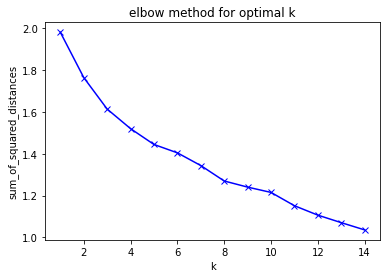

In [30]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(sanfran_data_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

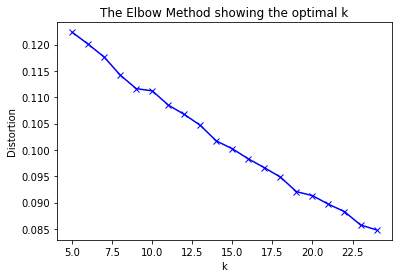

In [31]:
# Elbow Method (Distortions) function
distortions = []
K = range(5,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sanfran_data_grouped_clustering)
    kmeanModel.fit(sanfran_data_grouped_clustering)
    distortions.append(sum(np.min(cdist(sanfran_data_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sanfran_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [32]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=3).fit(sanfran_data_grouped_clustering)

In [33]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([0, 0, 0, 4, 4, 0, 0, 5, 4, 2, 0, 1, 0, 0, 0, 4, 1, 0, 0, 0, 4, 0,
       1, 0, 1, 0, 2, 4, 0, 0, 0, 4, 4, 4, 0, 2, 4, 0, 0, 3, 4, 0, 1, 4,
       0, 0, 0, 4, 0, 1, 1, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 2, 0,
       0, 2, 2, 2, 0, 1, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 1, 0, 4, 2,
       0, 1, 4, 0])

In [34]:
sf_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sf_neighborhoods_venues_sorted.head()

Cluster Labels     Neighborhood 1st Most Common Venue  \
0               0     Alamo Square        Ice Cream Shop   
1               0       Anza Vista                Bakery   
2               0   Balboa Terrace           Coffee Shop   
3               4          Bayview    Light Rail Station   
4               4  Bayview Heights                  Café   

      2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Sushi Restaurant           Coffee Shop       Bubble Tea Shop   
1   New American Restaurant      Sushi Restaurant    Mexican Restaurant   
2                    Bakery           Pizza Place                  Park   
3             Grocery Store   American Restaurant       Motorcycle Shop   
4                      Park   American Restaurant       Bubble Tea Shop   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Italian Restaurant          Cocktail Bar                  Café   
1   American Restaurant                  Café                  Park   
2                   Gym        Cosmetics Shop    Chinese Restaurant   
3                Bakery                  Park    Mexican Restaurant   
4           Coffee Shop                Bakery     Mobile Phone Shop   

   8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
0                   Park     Mediterranean Restaurant           Liquor Store  
1           Gourmet Shop                  Yoga Studio   Gym / Fitness Center  
2   Gym / Fitness Center          Japanese Restaurant             Comic Shop  
3      Food & Drink Shop                 Soccer Field          Deli / Bodega  
4      Convenience Store   Construction & Landscaping     Mexican Restaurant

In [35]:
# merge toronto_grouped with sanfran_data to add latitude/longitude for each neighborhood
sanfran_data_merged = sanfran_data

sanfran_data_merged = sanfran_data_merged.join(sf_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(sanfran_data_merged.shape)
sanfran_data_merged

(93, 17)


City                      Neighborhood   Longitude  \
0   San Francisco, California                      Alamo Square -122.434465   
1   San Francisco, California                        Anza Vista -122.443353   
2   San Francisco, California                    Balboa Terrace -122.468460   
3   San Francisco, California                           Bayview -122.385272   
4   San Francisco, California                   Bayview Heights -122.396834   
5   San Francisco, California                    Bernal Heights -122.416410   
6   San Francisco, California  Buena Vista Park/Ashbury Heights -122.441887   
7   San Francisco, California                 Candlestick Point -122.386528   
8   San Francisco, California                  Central Richmond -122.482131   
9   San Francisco, California                    Central Sunset -122.486262   
10  San Francisco, California       Central Waterfront/Dogpatch -122.386370   
11  San Francisco, California                 Clarendon Heights -122.448908   
12  San Francisco, California     Cole Valley/Parnassus Heights -122.451886   
13  San Francisco, California                    Corona Heights -122.440378   
14  San Francisco, California                        Cow Hollow -122.436000   
15  San Francisco, California                    Crocker Amazon -122.439009   
16  San Francisco, California                   Diamond Heights -122.442887   
17  San Francisco, California                          Downtown -122.411989   
18  San Francisco, California                   Duboce Triangle -122.432415   
19  San Francisco, California   Eureka Valley / Dolores Heights -122.433270   
20  San Francisco, California                         Excelsior -122.428695   
21  San Francisco, California  Financial District/Barbary Coast -122.401800   
22  San Francisco, California                       Forest Hill -122.463518   
23  San Francisco, California            Forest Hills Extension -122.458085   
24  San Francisco, California                     Forest Knolls -122.458378   
25  San Francisco, California                         Glen Park -122.434344   
26  San Francisco, California               Golden Gate Heights -122.469700   
27  San Francisco, California                  Golden Gate Park -122.481981   
28  San Francisco, California                    Haight Ashbury -122.449797   
29  San Francisco, California                      Hayes Valley -122.424961   
30  San Francisco, California                     Hunters Point -122.372919   
31  San Francisco, California                         Ingleside -122.455466   
32  San Francisco, California                 Ingleside Heights -122.467533   
33  San Francisco, California                 Ingleside Terrace -122.468298   
34  San Francisco, California                     Inner Mission -122.413559   
35  San Francisco, California                    Inner Parkside -122.473535   
36  San Francisco, California                    Inner Richmond -122.465523   
37  San Francisco, California                      Inner Sunset -122.468301   
38  San Francisco, California      Jordan Park / Laurel Heights -122.452722   
39  San Francisco, California                        Lake Shore -122.493160   
40  San Francisco, California                       Lake Street -122.473449   
41  San Francisco, California                          Lakeside -122.473808   
42  San Francisco, California                      Lincoln Park -122.503662   
43  San Francisco, California                      Lincoln Park -122.503662   
44  San Francisco, California                  Little Hollywood -122.399575   
45  San Francisco, California                     Lone Mountain -122.453024   
46  San Francisco, California             Lower Pacific Heights -122.435392   
47  San Francisco, California                            Marina -122.437035   
48  San Francisco, California                    Merced Heights -122.467543   
49  San Francisco, California                      Merced Manor -122.478490

In [36]:

#List Cluster Labels as type integer. Check Dataframe Shape
sanfran_data_merged['Cluster Labels']=sanfran_data_merged['Cluster Labels'].astype(int)
print(sanfran_data_merged.shape)

(93, 17)


In [37]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('San Francisco, California')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sanfran_data_merged['Latitude'], sanfran_data_merged['Longitude'], sanfran_data_merged['Neighborhood'], sanfran_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [38]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 0, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
0   San Francisco, California       94117               0   
1   San Francisco, California       94115               0   
2   San Francisco, California       94127               0   
5   San Francisco, California       94110               0   
6   San Francisco, California       94117               0   
10  San Francisco, California       94107               0   
12  San Francisco, California       94117               0   
13  San Francisco, California       94114               0   
14  San Francisco, California       94123               0   
17  San Francisco, California       94102               0   
18  San Francisco, California       94114               0   
19  San Francisco, California       94114               0   
21  San Francisco, California       94111               0   
23  San Francisco, California       94127               0   
25  San Francisco, California       94131               0   
28  San Francisco, California       94117               0   
29  San Francisco, California       94102               0   
30  San Francisco, California       94124               0   
34  San Francisco, California       94110               0   
37  San Francisco, California       94122               0   
38  San Francisco, California       94118               0   
41  San Francisco, California       94132               0   
45  San Francisco, California       94118               0   
46  San Francisco, California       94115               0   
47  San Francisco, California       94123               0   
49  San Francisco, California       94132               0   
52  San Francisco, California       94158               0   
53  San Francisco, California       94110               0   
55  San Francisco, California       94127               0   
57  San Francisco, California       94109               0   
58  San Francisco, California       94114               0   
59  San Francisco, California       94133               0   
60  San Francisco, California       94117               0   
61  San Francisco, California       94133               0   
66  San Francisco, California       94122               0   
67  San Francisco, California       94115               0   
71  San Francisco, California       94107               0   
73  San Francisco, California       94118               0   
74  San Francisco, California       94109               0   
75  San Francisco, California       94127               0   
77  San Francisco, California       94127               0   
79  San Francisco, California       94107               0   
80  San Francisco, California       94103               0   
81  San Francisco, California       94132               0   
83  San Francisco, California       94133               0   
84  San Francisco, California       94102               0   
86  San Francisco, California       94109               0   
89  San Francisco, California       94115               0   
92  San Francisco, California       94105               0   

    1st Most Common Venue      2nd Most Common Venue  \
0          Ice Cream Shop           Sushi Restaurant   
1                  Bakery    New American Restaurant   
2             Coffee Shop                     Bakery   
5      Mexican Restaurant                Coffee Shop   
6             Coffee Shop                       Park   
10                   Café       Gym / Fitness Center   
12                   Park                   Boutique   
13                Gay Bar                Coffee Shop   
14         Cosmetics Shop         Italian Restaurant   
17           Cocktail Bar              Grocery Store   
18            Coffee Shop   Mediterranean Restaurant   
19                Gay Bar                     Bakery   
21            Coffee Shop    New American Restaurant   
23           Burger Joint                Coffee Shop   
25                   Park         Italian Restaurant   
28                   Park                       Café   
29               Wine 

In [39]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 1, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
11  San Francisco, California       94114               1   
16  San Francisco, California       94131               1   
22  San Francisco, California       94116               1   
24  San Francisco, California       94131               1   
42  San Francisco, California       94121               1   
43  San Francisco, California                           1   
50  San Francisco, California       94131               1   
51  San Francisco, California       94127               1   
72  San Francisco, California       94129               1   
85  San Francisco, California       94131               1   
90  San Francisco, California       94127               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
11                 Trail                  Park        Scenic Lookout   
16                  Park            Playground                 Trail   
22                  Park                 Trail          Burger Joint   
24                 Trail            Playground                  Park   
42                 Trail        Scenic Lookout                  Park   
43                 Trail        Scenic Lookout                  Park   
50                 Trail                  Park        Scenic Lookout   
51                  Park                 Trail           Bus Station   
72                 Trail           Golf Course                  Park   
85                 Trail        Scenic Lookout                  Park   
90                  Park        Breakfast Spot                  Tree   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
11            Playground    Mexican Restaurant   Monument / Landmark   
16           Coffee Shop              Pharmacy         Grocery Store   
22    Mexican Restaurant         Grocery Store        Sandwich Place   
24           Coffee Shop           Salad Place        Sandwich Place   
42   Monument / Landmark               Exhibit                 Beach   
43   Monument / Landmark               Exhibit                 Beach   
50    Light Rail Station                  Café              Pharmacy   
51     Convenience Store            Playground           Pizza Place   
72                Tunnel                  Café                Museum   
85            Playground                  Café        Sandwich Place   
90                 Trail                   Bar              Fountain   

     7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
11          Breakfast Spot     Convenience Store               Wine Bar   
16             Bus Station              Dive Bar          Burrito Place   
22             Coffee Shop            Playground       Business Service   
24      Light Rail Station      Sushi Restaurant                 Garden   
42                Pharmacy         Historic Site    American Restaurant   
43                Pharmacy         Historic Site    American Restaurant   
50           Grocery Store           Coffee Shop       Sushi Restaurant   
51                Bus Line                  Café          Grocery Store   
72   General Entertainment        Scenic Lookout         Baseball Field   
85             Yoga Studio           Bus Station                   Hill   
90                     Gym         Grocery Store   Cantonese Restaurant   

   10th Most Common Venue  
11                   Café  
16               Mountain  
22               Dive Bar  
24    Monument / Landmark  
42                   Café  
43                   Café  
50               Mountain  
51    Monument / Landmark  
72             Food Truck  
85    American Restaurant  
90    Monument / Landmark

In [40]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 2, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
9   San Francisco, California       94122               2   
26  San Francisco, California       94116               2   
35  San Francisco, California       94116               2   
65  San Francisco, California       94121               2   
68  San Francisco, California       94116               2   
69  San Francisco, California       94132               2   
70  San Francisco, California       94134               2   
88  San Francisco, California       94127               2   

   1st Most Common Venue   2nd Most Common Venue 3rd Most Common Venue  \
9     Chinese Restaurant   Vietnamese Restaurant       Bubble Tea Shop   
26    Chinese Restaurant                   Trail          Dessert Shop   
35    Chinese Restaurant             Pizza Place      Sushi Restaurant   
65    Chinese Restaurant                    Café   American Restaurant   
68    Chinese Restaurant                    Park      Sushi Restaurant   
69    Chinese Restaurant                    Park        Sandwich Place   
70    Chinese Restaurant   Vietnamese Restaurant       Bubble Tea Shop   
88    Chinese Restaurant                    Park           Pizza Place   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
9                 Bakery                  Bank    Dim Sum Restaurant   
26              Bus Stop                  Park              Pharmacy   
35                  Park           Coffee Shop              Pharmacy   
65              Pharmacy        Sandwich Place              Bus Stop   
68           Pizza Place     Korean Restaurant   Dumpling Restaurant   
69           Pizza Place   Dumpling Restaurant            Food Truck   
70         Grocery Store                  Park        Sandwich Place   
88      Sushi Restaurant    Italian Restaurant           Coffee Shop   

   7th Most Common Venue   8th Most Common Venue 9th Most Common Venue  \
9    Japanese Restaurant             Coffee Shop       Thai Restaurant   
26           Coffee Shop   Vietnamese Restaurant           Gas Station   
35                   Pub             Gas Station    Italian Restaurant   
65                Bakery     Japanese Restaurant            Playground   
68        Sandwich Place             Gas Station    Light Rail Station   
69              Bus Stop        Sushi Restaurant                   Gym   
70                Bakery             Pizza Place          Liquor Store   
88                   Pub             Gas Station        Breakfast Spot   

   10th Most Common Venue  
9           Deli / Bodega  
26                 Garden  
35         Sandwich Place  
65                Exhibit  
68                   Café  
69      Korean Restaurant  
70            Coffee Shop  
88           Burger Joint

In [41]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 3, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
39  San Francisco, California       94132               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
39                  Park                 Trail                  Lake   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
39           Golf Course        Sandwich Place              Gym Pool   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
39   Gym / Fitness Center   American Restaurant         Historic Site   

   10th Most Common Venue  
39      College Cafeteria

In [42]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 4, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
3   San Francisco, California       94124               4   
4   San Francisco, California       94124               4   
8   San Francisco, California       94121               4   
15  San Francisco, California       94112               4   
20  San Francisco, California       94112               4   
27  San Francisco, California       94122               4   
31  San Francisco, California       94112               4   
32  San Francisco, California       94132               4   
33  San Francisco, California       94127               4   
36  San Francisco, California       94118               4   
40  San Francisco, California       94118               4   
44  San Francisco, California       94134               4   
48  San Francisco, California       94132               4   
54  San Francisco, California       94112               4   
56  San Francisco, California       94127               4   
62  San Francisco, California       94112               4   
63  San Francisco, California       94112               4   
64  San Francisco, California       94116               4   
76  San Francisco, California       94121               4   
78  San Francisco, California       94124               4   
82  San Francisco, California       94112               4   
87  San Francisco, California       94134               4   
91  San Francisco, California       94112               4   

   1st Most Common Venue   2nd Most Common Venue   3rd Most Common Venue  \
3     Light Rail Station           Grocery Store     American Restaurant   
4                   Café                    Park     American Restaurant   
8                   Café        Sushi Restaurant      Chinese Restaurant   
15        Baseball Field            Liquor Store             Pizza Place   
20    Mexican Restaurant   Vietnamese Restaurant          Baseball Field   
27                  Park         Bubble Tea Shop   Vietnamese Restaurant   
31      Asian Restaurant      Chinese Restaurant                    Café   
32   Rental Car Location      Light Rail Station              Playground   
33                Bakery     Japanese Restaurant      Mexican Restaurant   
36                Bakery      Chinese Restaurant     Japanese Restaurant   
40    Chinese Restaurant                  Bakery   Vietnamese Restaurant   
44                  Park             Coffee Shop      Light Rail Station   
48            Playground             Pizza Place      Chinese Restaurant   
54    Mexican Restaurant             Pizza Place             Bus Station   
56      Asian Restaurant     Japanese Restaurant         Bubble Tea Shop   
62    Light Rail Station      Chinese Restaurant            Liquor Store   
63           Pizza Place      Mexican Restaurant             Bus Station   
64        Baseball Field             Zoo Exhibit             Pizza Place   
76                  Café        Sushi Restaurant      Chinese Restaurant   
78    Chinese Restaurant   Vietnamese Restaurant           Grocery Store   
82                  Park           Grocery Store           Deli / Bodega   
87           Coffee Shop                    Park          Baseball Field   
91      Asian Restaurant   Vietnamese Restaurant           Grocery Store   

         4th Most Common Venue             5th Most Common Venue  \
3              Motorcycle Shop                            Bakery   
4              Bubble Tea Shop                       Coffee Shop   
8                Grocery Store                       Pizza Place   
15       Vietnamese Restaurant                Mexican Restaurant   
20   Latin American Restaurant                        Playground   
27          Chinese Restaurant                            Bakery   
31         Japanese Restaurant                   Bubble Tea Shop   
32                 Pizza Place                     Grocery Store   
33                 Pizza Place                               Gym   
36            Sushi Restaurant                         

In [43]:
sanfran_data_merged.loc[sanfran_data_merged['Cluster Labels'] == 5, sanfran_data_merged.columns[[0]  + list(range(5, sanfran_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
7  San Francisco, California                           5   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
7                  Park   American Restaurant      Football Stadium   

  4th Most Common Venue 5th Most Common Venue     6th Most Common Venue  \
7                Bistro            Campground   State / Provincial Park   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
7               Stadium            Food Truck     Food & Drink Shop   

  10th Most Common Venue  
7           Soccer Field

## K-Means Clustering (Chicago)

### Check for Optimal K (elbow Method)

In [44]:
# Remove column 'Neighborhood' from grouped data
chicago_data_grouped_clustering = chicago_data_grouped.drop('Neighborhood', 1)

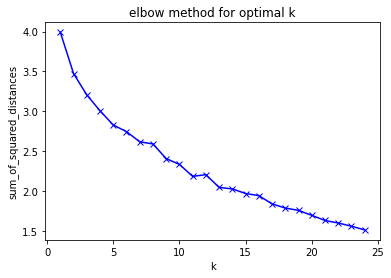

In [45]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,25)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(chicago_data_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

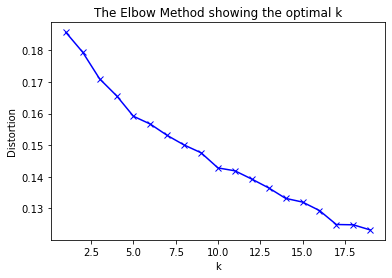

In [46]:
# Elbow Method (Distortions) function
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(chicago_data_grouped_clustering)
    kmeanModel.fit(chicago_data_grouped_clustering)
    distortions.append(sum(np.min(cdist(chicago_data_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / chicago_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [47]:
# set number of clusters
kclusters = 11

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=2).fit(chicago_data_grouped_clustering)

In [48]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([ 5,  7,  5,  1,  0,  9,  4,  0,  1,  5,  1,  7,  1,  5,  7,  9,  0,
        0,  5,  1,  5,  0,  1,  5,  7,  7,  7,  0,  4,  5,  5,  4,  5,  7,
        4,  9,  7,  7,  8,  5,  4,  7,  1,  4,  5,  4,  7,  7,  7,  7,  5,
        7,  7,  5,  7,  5,  7,  5,  9,  4,  7,  1,  5,  7,  0,  1,  5,  7,
        4,  7,  1,  7,  6,  7,  2,  5,  0,  7,  1,  7,  5,  3,  1,  7,  7,
        1,  7,  4,  0,  5,  5,  7,  4, 10,  7,  7,  4,  7])

In [49]:
chi_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
chi_neighborhoods_venues_sorted.head()

Cluster Labels    Neighborhood  1st Most Common Venue  \
0               5     Albany Park     Mexican Restaurant   
1               7   Andersonville            Coffee Shop   
2               5  Archer Heights     Mexican Restaurant   
3               1   Armour Square       Baseball Stadium   
4               0         Ashburn   Fast Food Restaurant   

  2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
0        Discount Store           Pizza Place                   Park   
1      Sushi Restaurant      Asian Restaurant         Breakfast Spot   
2         Grocery Store     Mobile Phone Shop   Fast Food Restaurant   
3    Chinese Restaurant                   Bar         Sandwich Place   
4                  Park        Clothing Store          Hot Dog Joint   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Chinese Restaurant     Mobile Phone Shop            Hookah Bar   
1                Bakery                   Bar         Grocery Store   
2            Donut Shop        Clothing Store   Arts & Crafts Store   
3           Coffee Shop           Pizza Place   American Restaurant   
4           Wings Joint             Locksmith                  Bank   

              8th Most Common Venue 9th Most Common Venue  \
0                 Korean Restaurant        Sandwich Place   
1   Southern / Soul Food Restaurant               Theater   
2                Recycling Facility   Rental Car Location   
3                    Shipping Store            Sports Bar   
4                Mexican Restaurant   Fried Chicken Joint   

  10th Most Common Venue  
0    Fried Chicken Joint  
1     Italian Restaurant  
2              Nightclub  
3                 Lounge  
4    American Restaurant

In [50]:
# merge toronto_grouped with chicago_data to add latitude/longitude for each neighborhood
chicago_data_merged = chicago_data

chicago_data_merged = chicago_data_merged.join(chi_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(chicago_data_merged.shape)
chicago_data_merged

(103, 17)


City           Neighborhood  Longitude   Latitude  \
0    Chicago, Illinois            Albany Park -87.721560  41.968068   
1    Chicago, Illinois          Andersonville -87.667865  41.979854   
2    Chicago, Illinois         Archer Heights -87.726363  41.810880   
3    Chicago, Illinois          Armour Square -87.633222  41.836091   
4    Chicago, Illinois                Ashburn -87.708365  41.745757   
5    Chicago, Illinois         Auburn Gresham -87.656307  41.744205   
6    Chicago, Illinois                 Austin -87.758010  41.890650   
7    Chicago, Illinois            Avalon Park -87.586349  41.744200   
8    Chicago, Illinois               Avondale -87.711211  41.938666   
9    Chicago, Illinois         Belmont Cragin -87.765502  41.927261   
10   Chicago, Illinois                Beverly -87.675075  41.713150   
11   Chicago, Illinois               Boystown -87.647447  41.943924   
12   Chicago, Illinois             Bridgeport -87.648788  41.836151   
13   Chicago, Illinois          Brighton Park -87.698861  41.817367   
14   Chicago, Illinois               Bucktown -87.678785  41.921687   
15   Chicago, Illinois               Burnside -87.596476  41.728182   
16   Chicago, Illinois        Calumet Heights -87.572718  41.729676   
17   Chicago, Illinois                Chatham -87.615970  41.740206   
18   Chicago, Illinois           Chicago Lawn -87.695666  41.771849   
19   Chicago, Illinois              Chinatown -87.635186  41.851733   
20   Chicago, Illinois              Chinatown -87.635186  41.851733   
21   Chicago, Illinois               Clearing -87.768511  41.779581   
22   Chicago, Illinois                Douglas -87.618678  41.835118   
23   Chicago, Illinois                Dunning -87.806020  41.946511   
24   Chicago, Illinois              East Side -87.534902  41.707314   
25   Chicago, Illinois           East Village -87.672275  41.899630   
26   Chicago, Illinois           East Village -87.672275  41.899630   
27   Chicago, Illinois              Edgewater -87.662320  41.988403   
28   Chicago, Illinois            Edison Park -87.813781  42.007613   
29   Chicago, Illinois              Englewood -87.654706  41.776556   
30   Chicago, Illinois            Fuller Park -87.632425  41.809085   
31   Chicago, Illinois              Gage Park -87.696435  41.795431   
32   Chicago, Illinois               Galewood -87.792795  41.914187   
33   Chicago, Illinois          Garfield Park -87.715659  41.878786   
34   Chicago, Illinois         Garfield Ridge -87.769625  41.792592   
35   Chicago, Illinois             Gold Coast -87.627104  41.906006   
36   Chicago, Illinois        Grand Boulevard -87.617860  41.812949   
37   Chicago, Illinois         Grand Crossing -87.616134  41.763247   
38   Chicago, Illinois             Grant Park -87.620837  41.874298   
39   Chicago, Illinois              Greektown -87.647127  41.878545   
40   Chicago, Illinois              Hegewisch -87.540715  41.663671   
41   Chicago, Illinois                Hermosa -87.734740  41.924348   
42   Chicago, Illinois          Humboldt Park -87.716507  41.900889   
43   Chicago, Illinois              Hyde Park -87.593914  41.794825   
44   Chicago, Illinois            Irving Park -87.723452  41.953582   
45   Chicago, Illinois           Jackson Park -87.579953  41.781854   
46   Chicago, Illinois         Jefferson Park -87.771167  41.978830   
47   Chicago, Illinois                Kenwood -87.596184  41.808916   
48   Chicago, Illinois              Lake View -87.663088  41.939786   
49   Chicago, Illinois           Lincoln Park -87.635810  41.925409   
50   Chicago, Illinois           Lincoln Park -87.635810  41.925409   
51   Chicago, Illinois         Lincoln Square -87.690439  41.972233   
52   Chicago, Illinois         Lincoln Square -87.690439  41.972233   
53   Chicago, Illinois      Little Italy, UIC -87.667757  41.867539   
54   Chicago, Illinois         Little Village -87.714002  41.839087   
55   Chicago, Illinois           Logan Squ

In [51]:

#List Cluster Labels as type integer. Check Dataframe Shape
chicago_data_merged['Cluster Labels']=chicago_data_merged['Cluster Labels'].astype(int)
print(chicago_data_merged.shape)

(103, 17)


In [52]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('Chicago, Illinois')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_data_merged['Latitude'], chicago_data_merged['Longitude'], chicago_data_merged['Neighborhood'], chicago_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 0, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  1st Most Common Venue  \
4   Chicago, Illinois       60652               0   Fast Food Restaurant   
7   Chicago, Illinois       60619               0   Fast Food Restaurant   
16  Chicago, Illinois       60617               0   Fast Food Restaurant   
17  Chicago, Illinois       60619               0   Fast Food Restaurant   
22  Chicago, Illinois       60616               0         Sandwich Place   
29  Chicago, Illinois       60636               0   Fast Food Restaurant   
68  Chicago, Illinois       60623               0          Movie Theater   
80  Chicago, Illinois       60628               0         Discount Store   
93  Chicago, Illinois       60637               0    Fried Chicken Joint   

    2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
4                    Park         Clothing Store         Hot Dog Joint   
7           Hot Dog Joint         Sandwich Place         Grocery Store   
16         Sandwich Place      Mobile Phone Shop     Currency Exchange   
17               Boutique     Chinese Restaurant        Discount Store   
22   Fast Food Restaurant         Shipping Store                  Park   
29     Seafood Restaurant         Discount Store         Train Station   
68                   Food   Fast Food Restaurant            Food Truck   
80         Sandwich Place             Donut Shop   Fried Chicken Joint   
93           Intersection   Fast Food Restaurant        Breakfast Spot   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
4            Wings Joint              Locksmith                  Bank   
7         Discount Store                  Diner                  Park   
16             Gift Shop            Coffee Shop                  Park   
17                Lounge         Sandwich Place         Women's Store   
22           Coffee Shop    Fried Chicken Joint                   Gym   
29         Grocery Store            Wings Joint                  Park   
68                  Bank                   Café        Sandwich Place   
80          Liquor Store   Fast Food Restaurant    Chinese Restaurant   
93                Lounge            Gas Station            Donut Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
4     Mexican Restaurant   Fried Chicken Joint    American Restaurant  
7               Pharmacy           Supermarket               Boutique  
16           Bus Station      Business Service                   Lake  
17           Gas Station                  Bank                    Bar  
22           Bus Station                  Bank          Historic Site  
29            Restaurant        Sandwich Place            Coffee Shop  
68                Church   Fried Chicken Joint                   Park  
80           Bus Station              Pharmacy           Intersection  
93                  Park               Dog Run          Train Station

In [54]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 1, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
3   Chicago, Illinois       60616               1      Baseball Stadium   
8   Chicago, Illinois       60618               1    Mexican Restaurant   
10  Chicago, Illinois       60643               1           Pizza Place   
12  Chicago, Illinois       60608               1    Chinese Restaurant   
19  Chicago, Illinois       60616               1    Chinese Restaurant   
20  Chicago, Illinois       10002               1    Chinese Restaurant   
23  Chicago, Illinois       60634               1        Clothing Store   
44  Chicago, Illinois       60618               1        Sandwich Place   
65  Chicago, Illinois       60616               1    Chinese Restaurant   
69  Chicago, Illinois       60646               1           Bus Station   
74  Chicago, Illinois       60641               1    Italian Restaurant   
82  Chicago, Illinois       60646               1         Grocery Store   
86  Chicago, Illinois       60649               1    Seafood Restaurant   
89  Chicago, Illinois       60612               1               Stadium   

   2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
3     Chinese Restaurant                   Bar         Sandwich Place   
8                    Bar        Sandwich Place             Donut Shop   
10        Cosmetics Shop        Sandwich Place       Department Store   
12           Art Gallery                   Bar            Pizza Place   
19           Pizza Place      Asian Restaurant      Korean Restaurant   
20           Pizza Place      Asian Restaurant      Korean Restaurant   
23       Thai Restaurant        Lingerie Store   Fast Food Restaurant   
44                   Bar     Convenience Store      Mobile Phone Shop   
65           Pizza Place                Bakery                   Park   
69           Video Store     Korean Restaurant         Sandwich Place   
74           Pizza Place        Ice Cream Shop     Chinese Restaurant   
82           Golf Course                 Trail         Sandwich Place   
86                Bakery    Chinese Restaurant         Cosmetics Shop   
89          Hockey Arena     Outdoor Sculpture            Art Gallery   

    5th Most Common Venue             6th Most Common Venue  \
3             Coffee Shop                       Pizza Place   
8           Grocery Store                Chinese Restaurant   
10            Coffee Shop                 Mobile Phone Shop   
12     Mexican Restaurant                            Bakery   
19     Mexican Restaurant                Dim Sum Restaurant   
20     Mexican Restaurant                Dim Sum Restaurant   
23            Pizza Place                    Ice Cream Shop   
44         Discount Store                       Pizza Place   
65      Korean Restaurant                  Asian Restaurant   
69                   Park                     Radio Station   
74   Fast Food Restaurant                Mexican Restaurant   
82   Fast Food Restaurant                        Restaurant   
86            Pizza Place   Southern / Soul Food Restaurant   
89                   Café                               Gym   

   7th Most Common Venue 8th Most Common Venue       9th Most Common Venue  \
3    American Restaurant        Shipping Store                  Sports Bar   
8     Italian Restaurant                  Park           Korean Restaurant   
10         Women's Store        Ice Cream Shop         Fried Chicken Joint   
12         Grocery Store   American Restaurant                    Pharmacy   
19          Dessert Shop       Bubble Tea Shop            Storage Facility   
20          Dessert Shop       Bubble Tea Shop            Storage Facility   
23          Cocktail Bar         Tattoo Parlor               Big Box Store   
44           Bus Station      Asian Restaurant   Latin American Restaurant   
65                 Hotel    Salon / Barbershop                 Candy Store   
69      Business Service          Outlet Store        Kitchen Supply 

In [55]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 2, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
78  Chicago, Illinois       60628               2                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
78         Grocery Store        Clothing Store     Electronics Store   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
78           Escape Room   Ethiopian Restaurant         Event Service   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
78           Event Space               Exhibit             Eye Doctor

In [56]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 3, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
85  Chicago, Illinois       60617               3                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
85            Bike Trail        Waste Facility           Zoo Exhibit   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
85        Farmers Market   Ethiopian Restaurant         Event Service   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
85           Event Space               Exhibit             Eye Doctor

In [57]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 4, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
6    Chicago, Illinois       60644               4   
30   Chicago, Illinois       60609               4   
33   Chicago, Illinois       60624               4   
36   Chicago, Illinois       60653               4   
42   Chicago, Illinois       60651               4   
45   Chicago, Illinois       60637               4   
47   Chicago, Illinois       60615               4   
63   Chicago, Illinois       60655               4   
72   Chicago, Illinois       60653               4   
91   Chicago, Illinois       10033               4   
92   Chicago, Illinois       60643               4   
97   Chicago, Illinois       60628               4   
101  Chicago, Illinois       60637               4   

           1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
6                 Discount Store        Sandwich Place             Donut Shop   
30                          Park           Bus Station         Baseball Field   
33              Botanical Garden            Shoe Store   Fast Food Restaurant   
36                     BBQ Joint                  Park          Train Station   
42                    Donut Shop         Grocery Store                   Park   
45                          Park        Science Museum        Harbor / Marina   
47                          Park           Pizza Place          Grocery Store   
63                          Park        Breakfast Spot            Pizza Place   
72                         Beach                  Park              BBQ Joint   
91           Fried Chicken Joint        Sandwich Place         Cosmetics Shop   
92           Fried Chicken Joint        Sandwich Place         Cosmetics Shop   
97    Construction & Landscaping         Grocery Store         Discount Store   
101                  Coffee Shop           Supermarket           Liquor Store   

     4th Most Common Venue       5th Most Common Venue 6th Most Common Venue  \
6           Cosmetics Shop        Fast Food Restaurant                  Café   
30    Fast Food Restaurant               Train Station                   Bar   
33           Train Station                 Supermarket        Discount Store   
36             Art Gallery              Discount Store           Coffee Shop   
42             Wings Joint   Latin American Restaurant           Music Venue   
45       Outdoor Sculpture                 Bus Station    Golf Driving Range   
47             Bus Station                       Hotel        Discount Store   
63      Mexican Restaurant                    Dive Bar             Gift Shop   
72                   Hotel       Performing Arts Venue                  Lake   
91                    Park         American Restaurant         Grocery Store   
92                    Park         American Restaurant         Grocery Store   
97                    Bank                Burger Joint              Pharmacy   
101   Caribbean Restaurant              Sandwich Place    Salon / Barbershop   

    7th Most Common Venue     8th Most Common Venue 9th Most Common Venue  \
6      Seafood Restaurant                      Park         Grocery Store   
30           Liquor Store                    Bakery          Optical Shop   
33               Pharmacy            Cosmetics Shop                 Diner   
36         Clothing Store        Seafood Restaurant         Deli / Bodega   
42         Clothing Store                Food Truck        Ice Cream Shop   
45         Ice Cream Shop                    Market                 Track   
47     Chinese Restaurant   Health & Beauty Service            Donut Shop   
63           Intersection            Ice Cream Shop                   Gym   
72          Grocery Store                Restaurant             Juice Bar   
91              Nightclub                 BBQ Joint           Gas Station   
92              Nightclub                 BBQ Joint           Gas Station   
97          Train Station            Clothing Store                  Park   
101 

In [58]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 5, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  1st Most Common Venue  \
0   Chicago, Illinois       60625               5     Mexican Restaurant   
2   Chicago, Illinois       60632               5     Mexican Restaurant   
9   Chicago, Illinois       60639               5             Donut Shop   
13  Chicago, Illinois       60632               5     Seafood Restaurant   
18  Chicago, Illinois       60629               5   Fast Food Restaurant   
21  Chicago, Illinois       60638               5            Pizza Place   
24  Chicago, Illinois       60617               5     Mexican Restaurant   
31  Chicago, Illinois       60632               5     Mexican Restaurant   
32  Chicago, Illinois       60707               5          Hot Dog Joint   
34  Chicago, Illinois       60638               5            Pizza Place   
41  Chicago, Illinois       60639               5     Mexican Restaurant   
46  Chicago, Illinois       60630               5            Pizza Place   
54  Chicago, Illinois       60623               5     Mexican Restaurant   
57  Chicago, Illinois       60608               5     Mexican Restaurant   
59  Chicago, Illinois       60609               5           Soccer Field   
61  Chicago, Illinois       60707               5          Grocery Store   
66  Chicago, Illinois       60609               5            Pizza Place   
70  Chicago, Illinois       60631               5                   Park   
79  Chicago, Illinois       60626               5     Mexican Restaurant   
84  Chicago, Illinois       60617               5                   Park   
94  Chicago, Illinois       60629               5     Mexican Restaurant   
95  Chicago, Illinois       60629               5     Mexican Restaurant   

    2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
0          Discount Store            Pizza Place                   Park   
2           Grocery Store      Mobile Phone Shop   Fast Food Restaurant   
9      Mexican Restaurant               Pharmacy         Sandwich Place   
13     Mexican Restaurant             Taco Place             Donut Shop   
18            Pizza Place     Mexican Restaurant                   Park   
21            Video Store          Hot Dog Joint             Sports Bar   
24            Pizza Place        Harbor / Marina                    Bar   
31          Grocery Store            Coffee Shop               Pharmacy   
32     Mexican Restaurant    Sporting Goods Shop         Sandwich Place   
34    American Restaurant            Supermarket                 Bakery   
41   Fast Food Restaurant         Discount Store            Pizza Place   
46     Chinese Restaurant     Mexican Restaurant      Convenience Store   
54         Ice Cream Shop            Bus Station      Mobile Phone Shop   
57          Grocery Store     Italian Restaurant            Pizza Place   
59             Donut Shop   Fast Food Restaurant         Discount Store   
61             Shoe Store            Pizza Place     Mexican Restaurant   
66     Mexican Restaurant                   Bank         Discount Store   
70            Pizza Place    American Restaurant              Bookstore   
79            Pizza Place         Sandwich Place                    Bar   
84          Grocery Store     Mexican Restaurant                    ATM   
94            Pizza Place         Ice Cream Shop            Video Store   
95         Ice Cream Shop   Fast Food Restaurant         Discount Store   

    5th Most Common Venue    6th Most Common Venue 7th Most Common Venue  \
0      Chinese Restaurant        Mobile Phone Shop            Hookah Bar   
2              Donut Shop           Clothing Store   Arts & Crafts Store   
9          Ice Cream Shop     Fast Food Restaurant    Chinese Restaurant   
13         Sandwich Place            Grocery Store        Ice Cream Shop   
18    American Restaurant           Discount Store          Intersection   
21             Playground       Mexican Restaurant             Nightclub   
24        

In [59]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 6, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
76  Chicago, Illinois       60628               6   Fried Chicken Joint   

   2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
76                  Park        Discount Store   Gym / Fitness Center   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
76      Football Stadium   American Restaurant        History Museum   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
76         Train Station        Clothing Store   Ethiopian Restaurant

In [60]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 7, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels   1st Most Common Venue  \
1    Chicago, Illinois       60640               7             Coffee Shop   
11   Chicago, Illinois       60657               7                 Gay Bar   
14   Chicago, Illinois       60647               7                     Bar   
25   Chicago, Illinois       60622               7      Mexican Restaurant   
26   Chicago, Illinois       10009               7      Mexican Restaurant   
27   Chicago, Illinois       60660               7             Coffee Shop   
28   Chicago, Illinois       60631               7      Italian Restaurant   
35   Chicago, Illinois       60610               7                   Hotel   
38   Chicago, Illinois       60605               7                    Park   
39   Chicago, Illinois       60661               7             Coffee Shop   
43   Chicago, Illinois       60615               7               Bookstore   
48   Chicago, Illinois       60657               7                     Bar   
49   Chicago, Illinois       94121               7             Zoo Exhibit   
50   Chicago, Illinois                           7             Zoo Exhibit   
51   Chicago, Illinois       60625               7                     Bar   
52   Chicago, Illinois       10023               7                     Bar   
53   Chicago, Illinois       60608               7      Italian Restaurant   
55   Chicago, Illinois       60647               7             Coffee Shop   
56   Chicago, Illinois       60603               7                   Hotel   
58   Chicago, Illinois       60611               7     American Restaurant   
60   Chicago, Illinois       60603               7                   Hotel   
64   Chicago, Illinois       60605               7                Aquarium   
67   Chicago, Illinois       60618               7                     Bar   
71   Chicago, Illinois       60666               7          Airport Lounge   
73   Chicago, Illinois       60614               7                     Bar   
75   Chicago, Illinois       60605               7             Pizza Place   
77   Chicago, Illinois       60610               7                     Gym   
81   Chicago, Illinois       60610               7                   Hotel   
83   Chicago, Illinois       60614               7             Coffee Shop   
87   Chicago, Illinois       60611               7                   Hotel   
88   Chicago, Illinois       60622               7                     Bar   
90   Chicago, Illinois       60640               7   Vietnamese Restaurant   
96   Chicago, Illinois       60607               7      Italian Restaurant   
99   Chicago, Illinois       60642               7             Coffee Shop   
100  Chicago, Illinois       60622               7             Pizza Place   
102  Chicago, Illinois       60613               7             Pizza Place   

        2nd Most Common Venue     3rd Most Common Venue  \
1            Sushi Restaurant          Asian Restaurant   
11                        Bar            Sandwich Place   
14                Coffee Shop             Grocery Store   
25                       Café          Sushi Restaurant   
26                       Café          Sushi Restaurant   
27           Asian Restaurant                       Gym   
28                        Bar                      Park   
35        American Restaurant        Italian Restaurant   
38                Coffee Shop               Pizza Place   
39           Greek Restaurant               Pizza Place   
43                       Café               Coffee Shop   
48                Pizza Place               Coffee Shop   
49                Pizza Place          Sushi Restaurant   
50                Pizza Place          Sushi Restaurant   
51             Sandwich Place               Coffee Shop   
52             Sandwich Place               Coffee Shop   
53         Mexican Restaurant           Thai Restaurant   
55               Cocktail Bar        Mexican Restaurant   
56        

In [61]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 8, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels     1st Most Common Venue  \
40  Chicago, Illinois       60633               8   State / Provincial Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
40    Chinese Restaurant          Fishing Spot          Home Service   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
40        Baseball Field   American Restaurant                  Farm   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
40   Ethiopian Restaurant         Event Service            Event Space

In [62]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 9, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
5   Chicago, Illinois       60620               9        Discount Store   
15  Chicago, Illinois       60619               9   Rental Car Location   
37  Chicago, Illinois       60619               9   American Restaurant   
62  Chicago, Illinois       60643               9             BBQ Joint   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5                  Lounge              Pharmacy   American Restaurant   
15   Fast Food Restaurant          Liquor Store        Ice Cream Shop   
37          Grocery Store             BBQ Joint                   Bar   
62         Cosmetics Shop                Market                Lawyer   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
5          Grocery Store   Fast Food Restaurant                Bakery   
15             Jazz Club               Pharmacy            Restaurant   
37                Lounge   Fast Food Restaurant   Fried Chicken Joint   
62                Lounge                  Track         Grocery Store   

   8th Most Common Venue  9th Most Common Venue  \
5            Gas Station                    Bar   
15                  Park   Caribbean Restaurant   
37     Currency Exchange               Boutique   
62                   Gym                  Train   

              10th Most Common Venue  
5                               Bank  
15   Southern / Soul Food Restaurant  
37                            Bakery  
62                     Train Station

In [63]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 10, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
98  Chicago, Illinois       60645              10     Indian Restaurant   

    2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
98   Pakistani Restaurant         Grocery Store   Fast Food Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
98                  Park     Korean Restaurant          Dessert Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
98    Mexican Restaurant           Pizza Place    American Restaurant

In [64]:
chicago_data_merged.loc[chicago_data_merged['Cluster Labels'] == 11, chicago_data_merged.columns[[0]  + list(range(5, chicago_data_merged.shape[1]))]]

Empty DataFrame
Columns: [City, Postal Code, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

## K-Means Clustering (Toronto)

### Check for Optimal K (elbow Method)

In [65]:
# Remove column 'Neighborhood' from grouped data
toronto_data_grouped_clustering = toronto_data_grouped.drop('Neighborhood', 1)

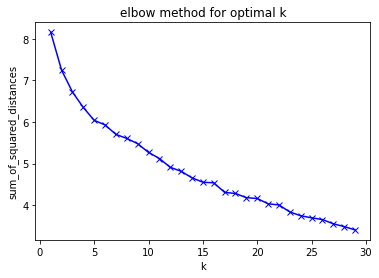

In [66]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(toronto_data_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

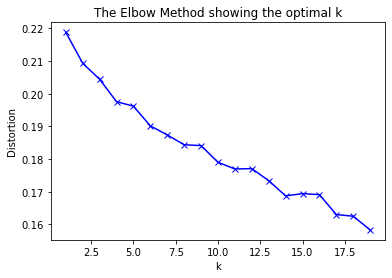

In [67]:
# Elbow Method (Distortions) function
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(toronto_data_grouped_clustering)
    kmeanModel.fit(toronto_data_grouped_clustering)
    distortions.append(sum(np.min(cdist(toronto_data_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / toronto_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [68]:
# set number of clusters
kclusters = 11

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=2).fit(toronto_data_grouped_clustering)

In [69]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([ 7,  5,  7,  0,  0,  2,  0,  7,  2,  0,  7,  2,  2,  7,  0,  7,  0,
        0,  7,  0,  7,  0,  8,  0,  0,  7,  7,  4,  0,  0,  7,  0,  0,  7,
        0,  0,  2,  7,  7,  7,  7,  0,  0,  0,  0,  7,  0,  2,  0,  0,  0,
        9,  7,  7,  0,  7,  0,  7,  7,  0,  7,  7,  0,  7,  0,  7,  2,  2,
        0,  0,  0,  0,  0,  7,  7,  7,  5,  0,  7,  0,  7,  7,  0,  0,  0,
        0,  6,  0,  0,  0,  7,  0,  7,  0,  0,  7,  0,  0,  7,  3,  0,  7,
        7,  0,  0,  1,  0,  7,  7,  0,  0, 10,  5,  4,  7,  0,  0,  0,  0,
        0,  0,  0,  0,  7,  0,  2,  7,  0,  7,  0,  2,  7,  7,  0,  0,  0,
        0,  0,  7,  7])

In [70]:
tor_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
tor_neighborhoods_venues_sorted.head()

Cluster Labels                  Neighborhood 1st Most Common Venue  \
0               7               Agincourt North    Chinese Restaurant   
1               5  Agincourt South-Malvern West    Chinese Restaurant   
2               7                     Alderwood           Gas Station   
3               0                         Annex    Italian Restaurant   
4               0             Banbury-Don Mills            Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0      Indian Restaurant        Discount Store                Bakery   
1   Cantonese Restaurant                Bakery         Shopping Mall   
2               Pharmacy           Pizza Place        Discount Store   
3            Coffee Shop                  Café            Restaurant   
4            Pizza Place           Coffee Shop   Japanese Restaurant   

        5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
0              Sandwich Place            Coffee Shop              Pharmacy   
1   Latin American Restaurant   Gym / Fitness Center    Seafood Restaurant   
2           Convenience Store                   Park                   Gym   
3                      Bakery      French Restaurant         Grocery Store   
4                        Café                   Bank     Electronics Store   

  8th Most Common Venue           9th Most Common Venue 10th Most Common Venue  
0           Pizza Place                            Bank     Salon / Barbershop  
1                Lounge                Malay Restaurant       Sushi Restaurant  
2         Grocery Store                  Sandwich Place          Shopping Mall  
3   Japanese Restaurant   Vegetarian / Vegan Restaurant              Gastropub  
4             Pet Store                    Liquor Store       Botanical Garden

In [71]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_data_merged = toronto_data

toronto_data_merged = toronto_data_merged.join(tor_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(toronto_data_merged.shape)
toronto_data_merged

(140, 17)


City                         Neighborhood  Longitude  \
0    Toronto, Canada                      Agincourt North -79.266712   
1    Toronto, Canada         Agincourt South-Malvern West -79.265612   
2    Toronto, Canada                            Alderwood -79.541611   
3    Toronto, Canada                                Annex -79.404001   
4    Toronto, Canada                    Banbury-Don Mills -79.349718   
5    Toronto, Canada                       Bathurst Manor -79.456055   
6    Toronto, Canada                  Bay Street Corridor -79.385721   
7    Toronto, Canada                      Bayview Village -79.377117   
8    Toronto, Canada                Bayview Woods-Steeles -79.382118   
9    Toronto, Canada                 Bedford Park-Nortown -79.420227   
10   Toronto, Canada              Beechborough-Greenbrook -79.479473   
11   Toronto, Canada                              Bendale -79.257400   
12   Toronto, Canada                Birchcliffe-Cliffside -79.265093   
13   Toronto, Canada                          Black Creek -79.521979   
14   Toronto, Canada                          Blake-Jones -79.337394   
15   Toronto, Canada                 Briar Hill-Belgravia -79.452851   
16   Toronto, Canada    Bridle Path-Sunnybrook-York Mills -79.378904   
17   Toronto, Canada                      Broadview North -79.355630   
18   Toronto, Canada                  Brookhaven-Amesbury -79.485589   
19   Toronto, Canada     Cabbagetown-South St. James Town -79.366107   
20   Toronto, Canada                   Caledonia-Fairbank -79.455212   
21   Toronto, Canada                            Casa Loma -79.408007   
22   Toronto, Canada               Centennial Scarborough -79.150843   
23   Toronto, Canada                Church-Yonge Corridor -79.379017   
24   Toronto, Canada                  Clairlea-Birchmount -79.281382   
25   Toronto, Canada                         Clanton Park -79.446303   
26   Toronto, Canada                           Cliffcrest -79.235530   
27   Toronto, Canada               Corso Italia-Davenport -79.447469   
28   Toronto, Canada                             Danforth -79.329819   
29   Toronto, Canada                   Danforth East York -79.331403   
30   Toronto, Canada                   Don Valley Village -79.353644   
31   Toronto, Canada                          Dorset Park -79.278908   
32   Toronto, Canada  Dovercourt-Wallace Emerson-Junction -79.438541   
33   Toronto, Canada                 Downsview-Roding-CFB -79.490497   
34   Toronto, Canada                       Dufferin Grove -79.437341   
35   Toronto, Canada                    East End-Danforth -79.299359   
36   Toronto, Canada             Edenbridge-Humber Valley -79.522458   
37   Toronto, Canada                        Eglinton East -79.245598   
38   Toronto, Canada                     Elms-Old Rexdale -79.548983   
39   Toronto, Canada                  Englemount-Lawrence -79.437409   
40   Toronto, Canada       Eringate-Centennial-West Deane -79.580445   
41   Toronto, Canada                  Etobicoke West Mall -79.568939   
42   Toronto, Canada                      Flemingdon Park -79.332646   
43   Toronto, Canada                    Forest Hill North -79.428143   
44   Toronto, Canada                    Forest Hill South -79.414318   
45   Toronto, Canada               Glenfield-Jane Heights -79.513465   
46   Toronto, Canada                    Greenwood-Coxwell -79.324318   
47   Toronto, Canada                            Guildwood -79.195055   
48   Toronto, Canada                           Henry Farm -79.341241   
49   Toronto, Canada                      High Park North -79.466302   
50   Toronto, Canada                    High Park-Swansea -79.467872   
51   Toronto, Canada                       Highland Creek -79.177472   
52   Toronto, Canada                    Hillcrest Village -79.354804   
53   Toronto, Canada             Humber Heights-Westmount -79.522416   
54   Toronto, Canada                        Humber Summi

In [72]:

#List Cluster Labels as type integer. Check Dataframe Shape
toronto_data_merged['Cluster Labels']=toronto_data_merged['Cluster Labels'].astype(int)
print(toronto_data_merged.shape)

(140, 17)


In [73]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('Toronto, Ontario')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_data_merged['Latitude'], toronto_data_merged['Longitude'], toronto_data_merged['Neighborhood'], toronto_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [74]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 0, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels       1st Most Common Venue  \
3    Toronto, Canada         M5R               0          Italian Restaurant   
4    Toronto, Canada         M3B               0                  Restaurant   
6    Toronto, Canada         M5G               0                 Coffee Shop   
9    Toronto, Canada         M5M               0                 Pizza Place   
14   Toronto, Canada         M4J               0                        Café   
16   Toronto, Canada         M3C               0        Gym / Fitness Center   
17   Toronto, Canada         M4K               0            Greek Restaurant   
19   Toronto, Canada         M4X               0                        Park   
21   Toronto, Canada         M5R               0                 Coffee Shop   
23   Toronto, Canada         M5B               0                 Coffee Shop   
24   Toronto, Canada         M1L               0                      Bakery   
28   Toronto, Canada         M4J               0                 Coffee Shop   
29   Toronto, Canada         M4J               0                 Coffee Shop   
31   Toronto, Canada         M1P               0           Indian Restaurant   
32   Toronto, Canada         M6H               0                         Bar   
34   Toronto, Canada         M6H               0                        Café   
35   Toronto, Canada         M4E               0                 Coffee Shop   
41   Toronto, Canada         M9C               0                        Café   
42   Toronto, Canada         M3C               0              Science Museum   
43   Toronto, Canada         M6C               0                  Bagel Shop   
44   Toronto, Canada         M5P               0                        Park   
46   Toronto, Canada         M4L               0           Indian Restaurant   
48   Toronto, Canada         M2J               0              Clothing Store   
49   Toronto, Canada         M6P               0                 Coffee Shop   
50   Toronto, Canada         M6S               0                 Coffee Shop   
54   Toronto, Canada         M9L               0           Electronics Store   
56   Toronto, Canada         M6C               0                  Bagel Shop   
59   Toronto, Canada         M6P               0                 Coffee Shop   
62   Toronto, Canada         M5T               0                        Café   
64   Toronto, Canada         M8X               0                 Coffee Shop   
68   Toronto, Canada         M4N               0            Sushi Restaurant   
69   Toronto, Canada         M4R               0                 Coffee Shop   
70   Toronto, Canada         M4G               0                      Bakery   
71   Toronto, Canada         M6K               0                        Café   
72   Toronto, Canada         M8W               0                 Coffee Shop   
77   Toronto, Canada         M8Z               0                     Brewery   
79   Toronto, Canada         M5A               0                 Coffee Shop   
82   Toronto, Canada         M4S               0                 Coffee Shop   
83   Toronto, Canada         M4S               0          Italian Restaurant   
84   Toronto, Canada         M8V               0                        Park   
85   Toronto, Canada         M2M               0   Middle Eastern Restaurant   
87   Toronto, Canada         M6K               0                 Coffee Shop   
88   Toronto, Canada         M4K               0            Greek Restaurant   
89   Toronto, Canada         M4X               0                 Coffee Shop   
91   Toronto, Canada         M1L               0                        Bank   
93   Toronto, Canada         M4J               0                        Park   
94   Toronto, Canada         M6G               0                        Café   
96   Toronto, Canada         M9M               0              Clothing Store   
97   Toronto, Canada         M4K               0            Greek Restaurant   
100  Toronto, Ca

In [75]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 1, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
105  Toronto, Canada         M1B               1           Zoo Exhibit   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
105   Other Great Outdoors                   Zoo             Gift Shop   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
105          Dessert Shop           Flea Market        Farmers Market   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
105   Fast Food Restaurant                 Field    Filipino Restaurant

In [76]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 2, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
5    Toronto, Canada         M3H               2                  Park   
8    Toronto, Canada         M2H               2                  Park   
11   Toronto, Canada         M1P               2                  Park   
12   Toronto, Canada         M1N               2                  Park   
36   Toronto, Canada         M9A               2                  Park   
47   Toronto, Canada         M1E               2         Grocery Store   
66   Toronto, Canada         M6S               2                  Park   
67   Toronto, Canada         M2N               2                  Park   
125  Toronto, Canada         M2R               2                  Park   
130  Toronto, Canada         M2N               2                  Park   

        2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
5           Convenience Store         Hardware Store            Men's Store   
8                        Bank         Sandwich Place      Recreation Center   
11                Pizza Place   Fast Food Restaurant   Caribbean Restaurant   
12            College Stadium                   Café                    Gym   
36                     Bakery               Bus Line                 Garden   
47                       Park          Train Station       Storage Facility   
66              Grocery Store                  River           Burger Joint   
67           Community Center             Ski Chalet                Dog Run   
125                    Bakery            Pizza Place          Shopping Mall   
130   Health & Beauty Service            Coffee Shop            Zoo Exhibit   

    5th Most Common Venue   6th Most Common Venue 7th Most Common Venue  \
5           Grocery Store          Breakfast Spot            Playground   
8                    Café             Coffee Shop    Chinese Restaurant   
11           Tennis Court           Grocery Store                Bakery   
12               Gym Pool   General Entertainment       Thai Restaurant   
36      Convenience Store       Electronics Store          Skating Rink   
47         Baseball Field             Coffee Shop        Sandwich Place   
66                    Spa                    Café         Metro Station   
67                    Spa                Ski Area           Flea Market   
125                  Bank                Bus Line           Coffee Shop   
130   Filipino Restaurant             Event Space    Falafel Restaurant   

            8th Most Common Venue    9th Most Common Venue  \
5                  Baseball Field   Furniture / Home Store   
8             Japanese Restaurant              Gas Station   
11                    Coffee Shop                  Dog Run   
12                          Diner             Skating Rink   
36            Filipino Restaurant              Event Space   
47                    Pizza Place                    Hotel   
66                     Taco Place              Event Space   
67           Fast Food Restaurant               Food Court   
125   Eastern European Restaurant                 Pharmacy   
130                          Farm           Farmers Market   

     10th Most Common Venue  
5                Sports Bar  
8              Liquor Store  
11        Indian Restaurant  
12               Restaurant  
36       Falafel Restaurant  
47                 Bus Line  
66    Outdoors & Recreation  
67     Ethiopian Restaurant  
125            Skating Rink  
130    Fast Food Restaurant

In [77]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 3, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
99  Toronto, Canada         M9B               3             Locksmith   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
99        Clothing Store    Athletics & Sports            Playground   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
99           Zoo Exhibit   Ethiopian Restaurant    Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
99                  Farm        Farmers Market   Fast Food Restaurant

In [78]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 4, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
27   Toronto, Canada         M6E               4    Italian Restaurant   
113  Toronto, Canada         M8Y               4    Italian Restaurant   

    2nd Most Common Venue         3rd Most Common Venue 4th Most Common Venue  \
27               Bus Stop                   Coffee Shop     Convenience Store   
113        Ice Cream Shop   Eastern European Restaurant            Restaurant   

    5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
27       Sushi Restaurant         Breakfast Spot                  Café   
113                   Spa   Gym / Fitness Center   Filipino Restaurant   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
27                  Bakery                  Bank            Pizza Place  
113   Ethiopian Restaurant           Event Space     Falafel Restaurant

In [79]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 5, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
1    Toronto, Canada         M1S               5    Chinese Restaurant   
76   Toronto, Canada         M1V               5                  Park   
112  Toronto, Canada         M1W               5    Chinese Restaurant   

     2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
1     Cantonese Restaurant                Bakery          Shopping Mall   
76      Chinese Restaurant              Pharmacy     Dim Sum Restaurant   
112      Korean Restaurant           Supermarket   Hong Kong Restaurant   

          5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
1     Latin American Restaurant   Gym / Fitness Center    Seafood Restaurant   
76                       Bakery   Cantonese Restaurant        Discount Store   
112                      Bakery    Szechuan Restaurant             BBQ Joint   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1                  Lounge      Malay Restaurant       Sushi Restaurant  
76          Shopping Mall            Restaurant                   Food  
112           Gas Station    Dim Sum Restaurant               Tea Room

In [80]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 6, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
86  Toronto, Canada         M2R               6                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
86              Wine Bar          Skating Rink           Zoo Exhibit   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
86   Filipino Restaurant   Ethiopian Restaurant           Event Space   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
86    Falafel Restaurant                  Farm         Farmers Market

In [81]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 7, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels    1st Most Common Venue  \
0    Toronto, Canada         M1S               7       Chinese Restaurant   
2    Toronto, Canada         M8W               7              Gas Station   
7    Toronto, Canada         M2K               7                     Park   
10   Toronto, Canada         M6M               7              Coffee Shop   
13   Toronto, Canada         M3N               7            Grocery Store   
15   Toronto, Canada         M6E               7              Coffee Shop   
18   Toronto, Canada         M6M               7              Coffee Shop   
20   Toronto, Canada         M6E               7                 Bus Stop   
25   Toronto, Canada         M3H               7        Convenience Store   
26   Toronto, Canada         M1M               7           Ice Cream Shop   
30   Toronto, Canada         M2J               7           Clothing Store   
33   Toronto, Canada         M3M               7            Grocery Store   
37   Toronto, Canada         M1J               7                 Pharmacy   
38   Toronto, Canada         M9W               7        Convenience Store   
39   Toronto, Canada         M6A               7              Coffee Shop   
40   Toronto, Canada         M9C               7           Baseball Field   
45   Toronto, Canada         M3L               7    Vietnamese Restaurant   
52   Toronto, Canada         M2H               7       Chinese Restaurant   
53   Toronto, Canada         M9P               7                     Bank   
55   Toronto, Canada         M9M               7    Vietnamese Restaurant   
57   Toronto, Canada         M1K               7       Chinese Restaurant   
58   Toronto, Canada         M9B               7     Fast Food Restaurant   
60   Toronto, Canada         M6M               7           Discount Store   
61   Toronto, Canada         M1K               7              Coffee Shop   
63   Toronto, Canada         M9P               7              Coffee Shop   
65   Toronto, Canada         M1W               7       Chinese Restaurant   
73   Toronto, Canada                           7     Fast Food Restaurant   
74   Toronto, Canada         M6L               7     Fast Food Restaurant   
75   Toronto, Canada         M9C               7                     Bank   
78   Toronto, Canada         M1E               7                     Park   
80   Toronto, Canada         M6M               7   Furniture / Home Store   
81   Toronto, Canada         M9V               7              Pizza Place   
90   Toronto, Canada         M4B               7              Pizza Place   
92   Toronto, Canada         M6E               7              Pizza Place   
95   Toronto, Canada         M3A               7                 Bus Stop   
98   Toronto, Canada         M2J               7              Pizza Place   
101  Toronto, Canada         M9W               7              Coffee Shop   
102  Toronto, Canada         M6N               7                     Park   
107  Toronto, Canada         M6L               7              Gas Station   
108  Toronto, Canada         M1M               7              Coffee Shop   
114  Toronto, Canada         M1T               7     Fast Food Restaurant   
123  Toronto, Canada         M1E               7              Pizza Place   
126  Toronto, Canada         M9N               7              Coffee Shop   
128  Toronto, Canada         M1R               7              Pizza Place   
131  Toronto, Canada         M9R               7             Liquor Store   
132  Toronto, Canada         M1H               7     Fast Food Restaurant   
138  Toronto, Canada         M3J               7              Pizza Place   
139  Toronto, Canada         M6A               7     Fast Food Restaurant   

          2nd Most Common Venue    3rd Most Common Venue  \
0             Indian Restaurant           Discount Store   
2                      Pharmacy              Pizza Place   
7                Clothing Store                 Pharmacy   
10

In [82]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 8, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
22  Toronto, Canada         M1C               8                   Gym   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
22            Playground                   Bar                  Pool   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
22                  Park   Ethiopian Restaurant           Event Space   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
22    Falafel Restaurant                  Farm         Farmers Market

In [83]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 9, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
51  Toronto, Canada         M1C               9          Burger Joint   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
51        Breakfast Spot    Italian Restaurant          Neighborhood   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
51     Fish & Chips Shop           Flea Market                  Farm   

   8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
51        Farmers Market   Fast Food Restaurant                  Field

In [84]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 10, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
111  Toronto, Canada         M2L              10                  Park   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
111        Baseball Field                  Pool           Zoo Exhibit   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
111     Fish & Chips Shop    Falafel Restaurant                  Farm   

    8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
111        Farmers Market   Fast Food Restaurant                  Field

In [85]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 11, toronto_data_merged.columns[[0]  + list(range(5, toronto_data_merged.shape[1]))]]

Empty DataFrame
Columns: [City, Postal Code, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

## K-Means Clustering

### Check for Optimal K (elbow Method)

In [86]:
# Remove column 'Neighborhood' from grouped data
manhattan_data_grouped_clustering = manhattan_data_grouped.drop('Neighborhood', 1)

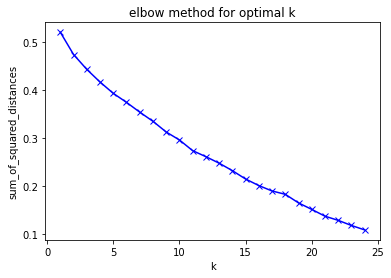

In [87]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,25)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(manhattan_data_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

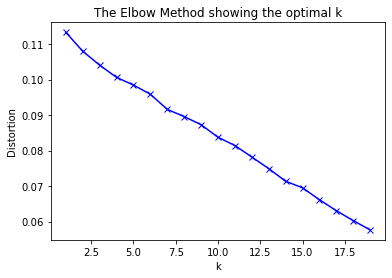

In [88]:
# Elbow Method (Distortions) function
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(manhattan_data_grouped_clustering)
    kmeanModel.fit(manhattan_data_grouped_clustering)
    distortions.append(sum(np.min(cdist(manhattan_data_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / manhattan_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [89]:
# set number of clusters
kclusters = 13

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=2).fit(manhattan_data_grouped_clustering)

In [90]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([ 9,  1,  2,  6,  4,  4, 10,  5, 12,  9,  3,  3,  7,  2, 10,  5,  1,
        3,  7,  6, 11,  2,  5,  8,  8, 11,  8,  6,  2,  7, 12,  3,  4,  0,
        0,  3,  1,  5, 11,  1])

In [91]:
man_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
man_neighborhoods_venues_sorted.head()

Cluster Labels       Neighborhood             1st Most Common Venue  \
0               9  Battery Park City                              Park   
1               1      Carnegie Hill                       Coffee Shop   
2               2     Central Harlem   Southern / Soul Food Restaurant   
3               6            Chelsea                       Art Gallery   
4               4          Chinatown                              Café   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Coffee Shop                 Hotel         Memorial Site   
1                  Café           Yoga Studio    Italian Restaurant   
2                  Café    African Restaurant      Sushi Restaurant   
3           Coffee Shop                Bakery   American Restaurant   
4        Ice Cream Shop    Chinese Restaurant        Sandwich Place   

  5th Most Common Venue  6th Most Common Venue  7th Most Common Venue  \
0                 Plaza   Gym / Fitness Center                    Gym   
1                   Gym              Wine Shop   Gym / Fitness Center   
2                   Bar                 Lounge            Pizza Place   
3    Seafood Restaurant     Italian Restaurant             Bagel Shop   
4              Wine Bar           Cocktail Bar            Coffee Shop   

      8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0               Pizza Place    Falafel Restaurant                   Café  
1                       Bar                Bakery      French Restaurant  
2         French Restaurant          Cocktail Bar     Seafood Restaurant  
3   New American Restaurant          Cycle Studio           Cupcake Shop  
4                       Spa                   Bar                 Bakery

In [92]:
# merge toronto_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_data_merged = manhattan_data

manhattan_data_merged = manhattan_data_merged.join(man_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
print(manhattan_data_merged.shape)
manhattan_data_merged

(44, 17)


City         Neighborhood  Longitude   Latitude  \
0   New York City, New York    Battery Park City -74.016869  40.711932   
1   New York City, New York        Carnegie Hill -73.953256  40.782683   
2   New York City, New York       Central Harlem -73.943211  40.815976   
3   New York City, New York              Chelsea -74.003116  40.744035   
4   New York City, New York            Chinatown -73.994279  40.715618   
5   New York City, New York            Chinatown -73.994279  40.715618   
6   New York City, New York         Civic Center -74.005415  40.715229   
7   New York City, New York              Clinton -73.996119  40.759101   
8   New York City, New York          East Harlem -73.944182  40.792249   
9   New York City, New York         East Village -73.982226  40.727847   
10  New York City, New York         East Village -73.982226  40.727847   
11  New York City, New York   Financial District -74.010665  40.707107   
12  New York City, New York             Flatiron -73.990947  40.739673   
13  New York City, New York             Gramercy -73.981376  40.737210   
14  New York City, New York    Greenwich Village -73.999914  40.726933   
15  New York City, New York     Hamilton Heights -73.949688  40.823604   
16  New York City, New York         Hudson Yards -74.000111  40.756658   
17  New York City, New York               Inwood -73.921210  40.867684   
18  New York City, New York           Lenox Hill -73.958860  40.768113   
19  New York City, New York       Lincoln Square -73.985338  40.773529   
20  New York City, New York       Lincoln Square -73.985338  40.773529   
21  New York City, New York         Little Italy -73.997305  40.719324   
22  New York City, New York      Lower East Side -73.980890  40.717807   
23  New York City, New York     Manhattan Valley -73.964286  40.797307   
24  New York City, New York       Manhattanville -73.957385  40.816934   
25  New York City, New York          Marble Hill -73.910660  40.876551   
26  New York City, New York              Midtown -73.981669  40.754691   
27  New York City, New York        Midtown South -73.988713  40.748510   
28  New York City, New York  Morningside Heights -73.963896  40.808000   
29  New York City, New York          Murray Hill -73.978332  40.748303   
30  New York City, New York                 Noho -73.988434  40.723259   
31  New York City, New York     Roosevelt Island -73.949168  40.762160   
32  New York City, New York                 Soho -74.000657  40.722184   
33  New York City, New York      Stuyvesant Town -73.974052  40.731000   
34  New York City, New York         Sutton Place -73.963556  40.760280   
35  New York City, New York              Tribeca -74.010683  40.721522   
36  New York City, New York           Tudor City -73.971219  40.746917   
37  New York City, New York           Turtle Bay -73.967708  40.752042   
38  New York City, New York      Upper East Side -73.960508  40.775639   
39  New York City, New York      Upper West Side -73.977059  40.787658   
40  New York City, New York   Washington Heights -73.936900  40.851903   
41  New York City, New York   Washington Heights -73.936900  40.851903   
42  New York City, New York         West Village -74.006180  40.734434   
43  New York City, New York            Yorkville -73.947118  40.775930   

      Borough Postal Code  Cluster Labels             1st Most Common Venue  \
0   Manhattan                           9                              Park   
1   Manhattan       10128               1                       Coffee Shop   
2   Manhattan       10030               2   Southern / Soul Food Restaurant   
3   Manhattan       10011               6                       Art Gallery   
4   Manhattan       60616               4                              Café   
5   Manhattan       10002               4                              Café   
6   Manhattan       10278               4                       Coffee Shop   
7   Manhattan       10036              10                   

In [93]:

#List Cluster Labels as type integer. Check Dataframe Shape
manhattan_data_merged['Cluster Labels']=manhattan_data_merged['Cluster Labels'].astype(int)
print(manhattan_data_merged.shape)

(44, 17)


In [94]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('Manhattan, New York')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_data_merged['Latitude'], manhattan_data_merged['Longitude'], manhattan_data_merged['Neighborhood'], manhattan_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [95]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 0, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
36  New York City, New York       10016               0      Sushi Restaurant   
37  New York City, New York       10017               0                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
36   American Restaurant           Coffee Shop         Grocery Store   
37      Sushi Restaurant     Indian Restaurant   Japanese Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
36          Burger Joint                  Café   Japanese Restaurant   
37      Greek Restaurant     French Restaurant        Sandwich Place   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
36           Pizza Place                  Park                    Gym  
37           Coffee Shop                Bakery               Wine Bar

In [96]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 1, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
1   New York City, New York       10128               1           Coffee Shop   
18  New York City, New York       10021               1    Italian Restaurant   
39  New York City, New York       10024               1    Italian Restaurant   
43  New York City, New York       10028               1                   Gym   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
1                   Café            Yoga Studio    Italian Restaurant   
18                   Gym   Gym / Fitness Center          Cycle Studio   
39           Coffee Shop                    Gym                  Café   
43           Coffee Shop         Ice Cream Shop    Italian Restaurant   

   5th Most Common Venue 6th Most Common Venue  7th Most Common Venue  \
1                    Gym             Wine Shop   Gym / Fitness Center   
18           Coffee Shop          Burger Joint               Wine Bar   
39                  Park                Bakery         Ice Cream Shop   
43           Pizza Place                Bakery                    Bar   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1                    Bar                Bakery      French Restaurant  
18      Sushi Restaurant          Cocktail Bar       Greek Restaurant  
39     Indian Restaurant                   Bar               Wine Bar  
43         Deli / Bodega    Mexican Restaurant              Wine Shop

In [97]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 2, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
2   New York City, New York       10030               2   
15  New York City, New York       10031               2   
24  New York City, New York       10027               2   
31  New York City, New York       10044               2   

               1st Most Common Venue 2nd Most Common Venue  \
2    Southern / Soul Food Restaurant                  Café   
15                       Coffee Shop                   Bar   
24                              Park    Italian Restaurant   
31                              Park           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2     African Restaurant      Sushi Restaurant                   Bar   
15                  Park    Mexican Restaurant                  Café   
24    Seafood Restaurant   American Restaurant    Mexican Restaurant   
31      Sushi Restaurant      Greek Restaurant           Pizza Place   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2                  Lounge           Pizza Place     French Restaurant   
15   Ethiopian Restaurant      Sushi Restaurant           Yoga Studio   
24                   Café           Coffee Shop              Boutique   
31             Playground          Cocktail Bar    Italian Restaurant   

   9th Most Common Venue 10th Most Common Venue  
2           Cocktail Bar     Seafood Restaurant  
15   American Restaurant          Deli / Bodega  
24           Pizza Place                Theater  
31         Deli / Bodega            Salad Place

In [98]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 3, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
12  New York City, New York       10011               3   
13  New York City, New York       10010               3   
19  New York City, New York       60625               3   
20  New York City, New York       10023               3   
34  New York City, New York       10022               3   
38  New York City, New York       10075               3   

    1st Most Common Venue     2nd Most Common Venue  3rd Most Common Venue  \
12   Gym / Fitness Center   New American Restaurant    Japanese Restaurant   
13    American Restaurant         Indian Restaurant                   Park   
19     Italian Restaurant                     Plaza            Coffee Shop   
20     Italian Restaurant                     Plaza            Coffee Shop   
34                   Park        Italian Restaurant   Gym / Fitness Center   
38                Exhibit        Italian Restaurant                 Bakery   

       4th Most Common Venue  5th Most Common Venue  \
12       American Restaurant                  Hotel   
13   New American Restaurant              Juice Bar   
19                   Theater    American Restaurant   
20                   Theater    American Restaurant   
34                     Hotel                 Bakery   
38               Coffee Shop   Gym / Fitness Center   

        6th Most Common Venue    7th Most Common Venue  \
12   Mediterranean Restaurant         Toy / Game Store   
13         Mexican Restaurant              Coffee Shop   
19                  Jazz Club    Performing Arts Venue   
20                  Jazz Club    Performing Arts Venue   
34          French Restaurant   Furniture / Home Store   
38                Yoga Studio      American Restaurant   

        8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
12               Cycle Studio                  Café                   Park  
13   Mediterranean Restaurant    Italian Restaurant   Gym / Fitness Center  
19              Grocery Store          Concert Hall                   Park  
20              Grocery Store          Concert Hall                   Park  
34         Salon / Barbershop           Coffee Shop                    Gym  
38                      Hotel             Juice Bar      Outdoor Sculpture

In [99]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 4, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
4   New York City, New York       60616               4                  Café   
5   New York City, New York       10002               4                  Café   
6   New York City, New York       10278               4           Coffee Shop   
35  New York City, New York       10013               4                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4         Ice Cream Shop    Chinese Restaurant        Sandwich Place   
5         Ice Cream Shop    Chinese Restaurant        Sandwich Place   
6                  Hotel          Cocktail Bar     French Restaurant   
35                 Hotel   American Restaurant    Italian Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
4               Wine Bar          Cocktail Bar           Coffee Shop   
5               Wine Bar          Cocktail Bar           Coffee Shop   
6    American Restaurant           Men's Store                Bakery   
35           Coffee Shop                   Spa          Cocktail Bar   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
4                    Spa                   Bar                 Bakery  
5                    Spa                   Bar                 Bakery  
6     Italian Restaurant    Chinese Restaurant                   Café  
35      Greek Restaurant           Men's Store                   Café

In [100]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 5, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
8   New York City, New York       10029               5   
17  New York City, New York       10034               5   
25  New York City, New York       10463               5   
40  New York City, New York       10033               5   
41  New York City, New York       60643               5   

         1st Most Common Venue 2nd Most Common Venue  \
8           Mexican Restaurant                Bakery   
17   Latin American Restaurant         Deli / Bodega   
25                        Park           Pizza Place   
40                        Café           Pizza Place   
41                        Café           Pizza Place   

         3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
8                         Café         Deli / Bodega           Pizza Place   
17                    Wine Bar    Mexican Restaurant    Spanish Restaurant   
25          Spanish Restaurant                  Café        Sandwich Place   
40   Latin American Restaurant                Bakery                  Park   
41   Latin American Restaurant                Bakery                  Park   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
8               Fountain       Thai Restaurant                   Gym   
17                  Café                Lounge            Restaurant   
25           Coffee Shop    Mexican Restaurant            Donut Shop   
40    Mexican Restaurant           Coffee Shop    Spanish Restaurant   
41    Mexican Restaurant           Coffee Shop    Spanish Restaurant   

   9th Most Common Venue 10th Most Common Venue  
8                  Plaza     Italian Restaurant  
17           Pizza Place                 Bakery  
25              Pharmacy          Deli / Bodega  
40                   Bar       Tapas Restaurant  
41                   Bar       Tapas Restaurant

In [101]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 6, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
3   New York City, New York       10011               6           Art Gallery   
22  New York City, New York       10002               6    Italian Restaurant   
30  New York City, New York       10009               6    Italian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3            Coffee Shop                Bakery   American Restaurant   
22           Art Gallery    Mexican Restaurant             Wine Shop   
30                 Hotel           Coffee Shop           Pizza Place   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3       Seafood Restaurant    Italian Restaurant            Bagel Shop   
22                Wine Bar        Ice Cream Shop           Coffee Shop   
30   Vietnamese Restaurant             Rock Club   Japanese Restaurant   

       8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
3    New American Restaurant          Cycle Studio           Cupcake Shop  
22              Cocktail Bar        Sandwich Place                 Bakery  
30              Cocktail Bar           Yoga Studio                   Café

In [102]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 7, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
14  New York City, New York       10012               7    Italian Restaurant   
21  New York City, New York       10013               7                  Café   
32  New York City, New York       10012               7    Italian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
14           Pizza Place                  Café        Sandwich Place   
21                 Hotel        Sandwich Place        Clothing Store   
32        Clothing Store                  Café        Cosmetics Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
14                   Gym        Clothing Store           Coffee Shop   
21    Italian Restaurant    Chinese Restaurant           Pizza Place   
32           Pizza Place           Coffee Shop                   Gym   

   8th Most Common Venue   9th Most Common Venue     10th Most Common Venue  
14    Seafood Restaurant        Sushi Restaurant        American Restaurant  
21                Bakery   Australian Restaurant                 Shoe Store  
32     French Restaurant                  Bakery   Mediterranean Restaurant

In [103]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 8, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
26  New York City, New York       10036               8               Theater   
27  New York City, New York       10001               8     Korean Restaurant   
29  New York City, New York       10016               8     Korean Restaurant   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
26                 Plaza    American Restaurant            Steakhouse   
27                 Hotel   Gym / Fitness Center           Coffee Shop   
29                 Hotel   Gym / Fitness Center           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue     7th Most Common Venue  \
26           Coffee Shop          Gourmet Shop                     Hotel   
27    Italian Restaurant   Japanese Restaurant   New American Restaurant   
29                Bakery          Gourmet Shop               Pizza Place   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
26           Salad Place        Sandwich Place          Women's Store  
27                  Café        Sandwich Place            Salad Place  
29         Grocery Store        Sandwich Place                    Gym

In [104]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 9, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
0   New York City, New York                           9                  Park   
11  New York City, New York       10005               9           Coffee Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Coffee Shop                 Hotel         Memorial Site   
11           Pizza Place                 Hotel          Cocktail Bar   

    5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
0                   Plaza   Gym / Fitness Center                   Gym   
11   Gym / Fitness Center     Falafel Restaurant         Memorial Site   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0            Pizza Place    Falafel Restaurant                   Café  
11            Steakhouse                  Park    American Restaurant

In [105]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 10, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
7   New York City, New York       10036              10               Theater   
16  New York City, New York       10018              10                 Hotel   

   2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
7            Coffee Shop                    Gym   Gym / Fitness Center   
16               Theater   Gym / Fitness Center            Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
7                  Hotel                Bakery          Burger Joint   
16                Lounge                   Gym          Dance Studio   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
7              Wine Shop   American Restaurant           Cocktail Bar  
16          Cocktail Bar         Indie Theater     Italian Restaurant

In [106]:
manhattan_data_merged.loc[manhattan_data_merged['Cluster Labels'] == 11, manhattan_data_merged.columns[[0]  + list(range(5, manhattan_data_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
23  New York City, New York       10025              11                  Park   
28  New York City, New York       10027              11           Coffee Shop   
42  New York City, New York       10014              11    Italian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
23           Coffee Shop         Grocery Store    Mexican Restaurant   
28                  Park   American Restaurant    Italian Restaurant   
42              Wine Bar   American Restaurant                  Park   

   5th Most Common Venue 6th Most Common Venue     7th Most Common Venue  \
23                   Bar    Chinese Restaurant                Playground   
28    Chinese Restaurant             Bookstore        Mexican Restaurant   
42           Coffee Shop          Cocktail Bar   New American Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
23        Ice Cream Shop        Farmers Market             Bagel Shop  
28         Grocery Store            Playground                 Bakery  
42                Bakery     Indian Restaurant         Cosmetics Shop

### Merge all Clusters (by cities) data into one DataFrame

In [303]:
mrg_mast=pd.DataFrame(columns=columns)


merged_list=[sanfran_data_merged,chicago_data_merged,toronto_data_merged,manhattan_data_merged]

# Function to rename columns and add borough data to all dataframes in list df
for i in range(len(merged_list)):
    df1=merged_list[i]
    cols=df1.columns
    df1=df1.fillna(value=cols[0],axis='columns')
    mrg_mast=mrg_mast.append(df1)
    i = i + 1
    
master_merged=mrg_mast.reset_index(drop=True)    
master_merged

1st Most Common Venue           2nd Most Common Venue  \
0                      Ice Cream Shop                Sushi Restaurant   
1                              Bakery         New American Restaurant   
2                         Coffee Shop                          Bakery   
3                  Light Rail Station                   Grocery Store   
4                                Café                            Park   
5                  Mexican Restaurant                     Coffee Shop   
6                         Coffee Shop                            Park   
7                                Park             American Restaurant   
8                                Café                Sushi Restaurant   
9                  Chinese Restaurant           Vietnamese Restaurant   
10                               Café            Gym / Fitness Center   
11                              Trail                            Park   
12                               Park                        Boutique   
13                            Gay Bar                     Coffee Shop   
14                     Cosmetics Shop              Italian Restaurant   
15                     Baseball Field                    Liquor Store   
16                               Park                      Playground   
17                       Cocktail Bar                   Grocery Store   
18                        Coffee Shop        Mediterranean Restaurant   
19                            Gay Bar                          Bakery   
20                 Mexican Restaurant           Vietnamese Restaurant   
21                        Coffee Shop         New American Restaurant   
22                               Park                           Trail   
23                       Burger Joint                     Coffee Shop   
24                              Trail                      Playground   
25                               Park              Italian Restaurant   
26                 Chinese Restaurant                           Trail   
27                               Park                 Bubble Tea Shop   
28                               Park                            Café   
29                           Wine Bar                    Optical Shop   
30                               Park                      Restaurant   
31                   Asian Restaurant              Chinese Restaurant   
32                Rental Car Location              Light Rail Station   
33                             Bakery             Japanese Restaurant   
34                 Mexican Restaurant                     Coffee Shop   
35                 Chinese Restaurant                     Pizza Place   
36                             Bakery              Chinese Restaurant   
37                             Garden                          Bakery   
38                        Coffee Shop          Furniture / Home Store   
39                               Park                           Trail   
40                 Chinese Restaurant                          Bakery   
41                                Gym                          Bakery   
42                              Trail                  Scenic Lookout   
43                              Trail                  Scenic Lookout   
44                               Park                     Coffee Shop   
45                               Park                     Coffee Shop   
46                             Bakery                  Cosmetics Shop   
47               Gym / Fitness Center                            Park   
48                         Playground                     Pizza Place   
49                               Park                      Food Truck   
50                              Trail                            Park   
51                               Park                           Trail   
52                        Coffee Shop                Baseball Stadium   
53                 Mexican Restaurant                     Pizza Place   
5

In [304]:
merg_cols=master_merged.columns.tolist()
print(len(merg_cols))
merg_cols

17


['1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue',
 'City',
 'Neighborhood',
 'Longitude',
 'Latitude',
 'Borough',
 'Postal Code',
 'Cluster Labels']

In [306]:
merg_cols=master_merged.columns[[11,10,13,12,15,16]+list(range(0,10))]

In [308]:
master_merged=master_merged[merg_cols]

In [311]:
master_merged.shape

(380, 16)

In [312]:
master_merged.to_csv(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\master_clusters.ipynb')


In [392]:
##Number of Venues for each Neighborhood
print(toronto_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(toronto_data_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(toronto_data_venues['Venue Category'].unique())))

                              Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                  
Agincourt North                                  41                      41   
Agincourt South-Malvern West                     38                      38   
Alderwood                                        25                      25   
Annex                                           100                     100   
Banbury-Don Mills                                47                      47   

                              Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                           
Agincourt North                  41              41               41   
Agincourt South-Malvern West     38              38               38   
Alderwood                        25              25               25   
Annex                           100             100              100   
Banbury-Don Mi

## We will

In [114]:
print(toronto_data_venues.columns)
print(manhattan_data_venues.columns)
print(sanfran_data_venues.columns)
print(chicago_data_venues.columns)

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')


In [365]:
master_venues=pd.DataFrame(columns=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

#Concatenate all venue data frames
master_venues_list=[sanfran_data_venues,chicago_data_venues,toronto_data_venues,manhattan_data_venues]
master_venues = pd.concat(master_venues_list)
master_venues.reset_index(inplace=True, drop=True)
master_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Alamo Square              37.776566             -122.434465   
1  Alamo Square              37.776566             -122.434465   
2  Alamo Square              37.776566             -122.434465   
3  Alamo Square              37.776566             -122.434465   
4  Alamo Square              37.776566             -122.434465   

                   Venue  Venue Latitude  Venue Longitude Venue Category  
0           Alamo Square       37.776045      -122.434363           Park  
1  Alamo Square Dog Park       37.775878      -122.435740        Dog Run  
2         Painted Ladies       37.776120      -122.433389  Historic Site  
3        The Independent       37.775573      -122.437835      Rock Club  
4               The Mill       37.776425      -122.437970         Bakery

In [366]:
##Number of Venues for each Neighborhood
print(master_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(master_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(master_venues['Venue Category'].unique())))

                              Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                  
Agincourt North                                  41                      41   
Agincourt South-Malvern West                     38                      38   
Alamo Square                                    100                     100   
Albany Park                                      76                      76   
Alderwood                                        25                      25   

                              Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                           
Agincourt North                  41              41               41   
Agincourt South-Malvern West     38              38               38   
Alamo Square                    100             100              100   
Albany Park                      76              76               76   
Alderwood     

In [387]:
#one hot encoding
data_master_onehot = pd.get_dummies(master_venues['Venue Category'], prefix="", prefix_sep="")

In [388]:
#add neighborhood column back to dataframe
data_master_onehot['Neighborhood'] = master_venues['Neighborhood'] 
data_master_onehot.head()

ATM  Acai House  Accessories Store  Adult Boutique  Afghan Restaurant  \
0    0           0                  0               0                  0   
1    0           0                  0               0                  0   
2    0           0                  0               0                  0   
3    0           0                  0               0                  0   
4    0           0                  0               0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  Alternative Healer  American Restaurant  Amphitheater  \
0                 0                   0                    0             0   
1                 0                   0                    0             0   
2                 0                   0                    0             0   
3                 0                   0                    0             0   
4                 0                   0                    0             0   

   Animal Shelter  Antique Shop  Aquarium  Arcade  Arepa Restaurant  \
0               0             0         0       0                 0   
1               0             0         0       0                 0   
2               0             0         0       0                 0   
3               0             0         0       0                 0   
4               0             0         0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auditorium  \
0                     0                 0                   0           0   
1                     0                 0                   0           0   
2                     0                 0                   0           0   
3                     0                 0                   0           0   
4                     0                 0                   0           0   

   Australian Restaurant  Austrian Restaurant  Auto Dealership  Auto Garage  \
0                      0                    0                0            0   
1                      0                    0                0            0   
2                      0                    0                0            0   
3                      0                    0                0            0   
4                      0                    0                0            0   

   Automotive Shop  BBQ Joint  Baby Store  Badminton Court  Bagel Shop  \
0                0          0           0                0           0   
1                0          0           0                0           0   
2                0          0           0                0           0   
3                0          0           0                0           0   
4                0          0           0                0           0   

   Bakery  Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0       0     0    0               0                 0                 0   
1       0     0    0               0                 0                 0   
2       0     0    0               0                 0                 0   
3       0     0    0               0                 0                 0   
4       1     0    0             

In [389]:
#move neighborhood column to the first column
fixed_columns = [data_master_onehot.columns[-1]] + list(data_master_onehot.columns[:-1])


data_master_onehot = data_master_onehot[fixed_columns]
data_master_onehot.head()
print(data_master_onehot.shape)

(23530, 521)


In [390]:
data_master_grouped = data_master_onehot.groupby('Neighborhood').mean().reset_index()
print(data_master_grouped.shape)
data_master_grouped.head()

(365, 521)


Neighborhood  Zoo Exhibit  ATM  Acai House  \
0               Agincourt North          0.0  0.0         0.0   
1  Agincourt South-Malvern West          0.0  0.0         0.0   
2                  Alamo Square          0.0  0.0         0.0   
3                   Albany Park          0.0  0.0         0.0   
4                     Alderwood          0.0  0.0         0.0   

   Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0               0.00             0.0                0.0                 0.0   
1               0.00             0.0                0.0                 0.0   
2               0.01             0.0                0.0                 0.0   
3               0.00             0.0                0.0                 0.0   
4               0.00             0.0                0.0                 0.0   

   Airport  Airport Lounge  Airport Service  Airport Terminal  \
0      0.0             0.0              0.0               0.0   
1      0.0             0.0              0.0               0.0   
2      0.0             0.0              0.0               0.0   
3      0.0             0.0              0.0               0.0   
4      0.0             0.0              0.0               0.0   

   Alternative Healer  American Restaurant  Amphitheater  Animal Shelter  \
0                 0.0             0.000000           0.0             0.0   
1                 0.0             0.026316           0.0             0.0   
2                 0.0             0.010000           0.0             0.0   
3                 0.0             0.026316           0.0             0.0   
4                 0.0             0.000000           0.0             0.0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0          0.00       0.0     0.0               0.0                     0.0   
1          0.00       0.0     0.0               0.0                     0.0   
2          0.01       0.0     0.0               0.0                     0.0   
3          0.00       0.0     0.0               0.0                     0.0   
4          0.00       0.0     0.0               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0          0.0         0.0                  0.0                   0.0   
1          0.0         0.0                  0.0                   0.0   
2          0.0         0.0                  0.0                   0.0   
3          0.0         0.0                  0.0                   0.0   
4          0.0         0.0                  0.0                   0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0          0.000000                 0.0         0.0                    0.0   
1          0.026316                 0.0         0.0                    0.0   
2          0.000000                 0.0         0.0                    0.0   
3          0.013158                 0.0         0.0                    0.0   
4          0.000000                 0.0         0.0                    0.0   

   Austrian Restaurant  Auto Dealership  Auto Garage  Automotive Shop  \
0                  0.0              0.0          0.0              0.0   
1                  0.0              0.0          0.0              0.0   
2                  0.0              0.0          0.0              0.0   
3                  0.0              0.0          0.0              0.0   
4                  0.0              0.0          0.0              0.0   

   BBQ Joint  Baby Store  Badminton Court  Bagel Shop    Bakery      Bank  \
0       0.00         0.0              0.0        0.00  0.048780  0.048780   
1       0.00         0.0              0.0        0.00  0.052632  0.026316   
2       0.02         0.0              0.0        0.01  0.020000  0.000000   
3       0.00         0.0              0.0        0.00  0.013158  0.013158   
4       0.00         0.0              0.0        0.00  0.000000  0.000000   

    Bar  Baseball Fi

In [372]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
master_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
master_neighborhoods_venues_sorted['Neighborhood'] = data_master_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(data_master_grouped.shape[0]):
    master_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_master_grouped.iloc[ind, :], num_top_venues)

master_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               Agincourt North    Chinese Restaurant                Bakery   
1  Agincourt South-Malvern West    Chinese Restaurant                Bakery   
2                  Alamo Square        Ice Cream Shop           Coffee Shop   
3                   Albany Park    Mexican Restaurant        Discount Store   
4                     Alderwood           Gas Station     Convenience Store   

   3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
0      Indian Restaurant           Pizza Place             Sandwich Place   
1   Cantonese Restaurant         Shopping Mall               Skating Rink   
2       Sushi Restaurant                  Café   Mediterranean Restaurant   
3            Pizza Place    Chinese Restaurant                 Hookah Bar   
4                   Park              Pharmacy                Pizza Place   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Bank           Coffee Shop              Pharmacy   
1           Pizza Place                Lounge      Malay Restaurant   
2          Liquor Store              Dive Bar           Pizza Place   
3                  Park     Mobile Phone Shop     Korean Restaurant   
4        Discount Store           Coffee Shop         Shopping Mall   

  9th Most Common Venue     10th Most Common Venue  
0        Discount Store         Salon / Barbershop  
1                  Bank   Mediterranean Restaurant  
2          Cocktail Bar                       Park  
3   Fried Chicken Joint              Grocery Store  
4        Sandwich Place                 Print Shop

## K-Means Clustering (All)

### Check for Optimal K (elbow Method)

In [373]:
#import Necessary Packages
from scipy.spatial.distance import cdist

In [374]:
# Remove column 'Neighborhood' from grouped data
data_master_grouped_clustering = data_master_grouped.drop('Neighborhood', 1)

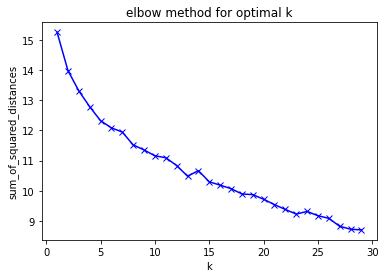

In [333]:
# Elbow Method (Inertia) function
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(data_master_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

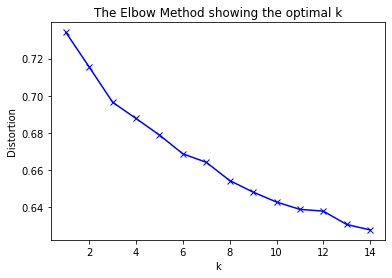

In [334]:
# Elbow Method (Distortions) function
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_master_grouped_clustering)
    kmeanModel.fit(data_master_grouped_clustering)
    distortions.append(sum(np.min(cdist(data_master_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sanfran_data_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [335]:
# set number of clusters
kclusters = 15

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=3).fit(data_master_grouped_clustering)

In [336]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:300] 

array([ 9,  9,  6, 10,  8,  6,  0,  6, 10,  6, 10, 10, 10, 10,  6,  6,  0,
       13,  6,  0,  2,  0,  2, 13,  0,  8, 10, 13,  0,  6, 13, 11,  0,  6,
        8,  9,  0, 10, 11, 11,  6,  6, 10,  2,  8, 10, 13,  6,  0, 13,  6,
       11,  9,  0, 10,  6, 10,  9,  0,  6,  0,  2,  2, 10,  8,  6,  2,  6,
        0,  6, 11,  0,  0, 13,  2,  0, 10,  0, 11,  6,  6,  0,  6,  0,  6,
       10,  6, 13,  0,  2,  8, 12,  8, 10,  2,  8,  6, 11,  6,  6,  6,  2,
        2,  0,  2,  0,  2,  2, 10, 10, 10, 10,  2, 11,  6,  9, 11,  6,  2,
       10,  6,  6,  6,  0, 13,  2,  0,  6,  9,  0, 10,  0,  0,  6, 11,  6,
        8,  6, 11, 10,  6, 13,  6, 11, 11, 11,  6,  9, 11, 11,  6,  9,  2,
        8,  2, 10,  6,  0,  8,  8,  0,  2,  8,  0,  8,  2, 11,  6,  6, 13,
       13,  0,  0,  0,  6,  2,  6,  2,  6,  2,  0, 10,  0,  0,  0,  6,  6,
        6, 10,  6,  8,  0,  6,  8,  2,  6,  8, 10, 11,  6,  6,  6,  2,  6,
        9,  0,  2,  0,  6, 11, 10,  0,  6,  8,  0,  0, 11,  8,  2,  8,  0,
        0,  6,  2,  9, 10

In [337]:
master_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
master_neighborhoods_venues_sorted.head()

Cluster Labels                  Neighborhood 1st Most Common Venue  \
0               9               Agincourt North    Chinese Restaurant   
1               9  Agincourt South-Malvern West    Chinese Restaurant   
2               6                  Alamo Square        Ice Cream Shop   
3              10                   Albany Park    Mexican Restaurant   
4               8                     Alderwood           Gas Station   

  2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
0                Bakery      Indian Restaurant           Pizza Place   
1                Bakery   Cantonese Restaurant         Shopping Mall   
2           Coffee Shop       Sushi Restaurant                  Café   
3        Discount Store            Pizza Place    Chinese Restaurant   
4     Convenience Store                   Park              Pharmacy   

       5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0             Sandwich Place                  Bank           Coffee Shop   
1               Skating Rink           Pizza Place                Lounge   
2   Mediterranean Restaurant          Liquor Store              Dive Bar   
3                 Hookah Bar                  Park     Mobile Phone Shop   
4                Pizza Place        Discount Store           Coffee Shop   

  8th Most Common Venue 9th Most Common Venue     10th Most Common Venue  
0              Pharmacy        Discount Store         Salon / Barbershop  
1      Malay Restaurant                  Bank   Mediterranean Restaurant  
2           Pizza Place          Cocktail Bar                       Park  
3     Korean Restaurant   Fried Chicken Joint              Grocery Store  
4         Shopping Mall        Sandwich Place                 Print Shop

In [382]:
data_mast.shape

(380, 6)

In [ ]:
# merge clustered venue data with master data to add latitude/longitude for each neighborhood
data_master_merged = data_mast

In [338]:
data_master_merged = data_master_merged.join(master_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [380]:
#List columns for column reorganization (see code below)
print(data_master_merged.columns)
data_master_merged.shape

Index(['City', 'Neighborhood', 'Longitude', 'Latitude', 'Borough',
       'Postal Code', 'Cluster Labels', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue'],
      dtype='object')


(380, 17)

In [346]:
# check the last columns!

master_cols=data_master_merged.columns[[1,0,2,3]+list(range(6,data_master_merged.shape[1]))]
master_venues_merged=data_master_merged[master_cols]
print(master_venues_merged.shape)
master_venues_merged.head(3)

(380, 17)
(380, 15)


Neighborhood                       City   Longitude  \
0               Agincourt North            Toronto, Canada  -79.266712   
1  Agincourt South-Malvern West            Toronto, Canada  -79.265612   
2                  Alamo Square  San Francisco, California -122.434465   
3                   Albany Park          Chicago, Illinois  -87.721560   
4                     Alderwood            Toronto, Canada  -79.541611   

    Latitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  43.805441               9    Chinese Restaurant                Bakery   
1  43.788658               9    Chinese Restaurant                Bakery   
2  37.776566               6        Ice Cream Shop           Coffee Shop   
3  41.968068              10    Mexican Restaurant        Discount Store   
4  43.604937               8           Gas Station     Convenience Store   

   3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
0      Indian Restaurant           Pizza Place             Sandwich Place   
1   Cantonese Restaurant         Shopping Mall               Skating Rink   
2       Sushi Restaurant                  Café   Mediterranean Restaurant   
3            Pizza Place    Chinese Restaurant                 Hookah Bar   
4                   Park              Pharmacy                Pizza Place   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Bank           Coffee Shop              Pharmacy   
1           Pizza Place                Lounge      Malay Restaurant   
2          Liquor Store              Dive Bar           Pizza Place   
3                  Park     Mobile Phone Shop     Korean Restaurant   
4        Discount Store           Coffee Shop         Shopping Mall   

  9th Most Common Venue     10th Most Common Venue  
0        Discount Store         Salon / Barbershop  
1                  Bank   Mediterranean Restaurant  
2          Cocktail Bar                       Park  
3   Fried Chicken Joint              Grocery Store  
4        Sandwich Place                 Print Shop

In [348]:
master_venues_merged=pd.DataFrame(master_venues_merged)

#List Cluster Labels as type integer. Check Dataframe Shape
data_master_merged['Cluster Labels']=data_master_merged['Cluster Labels'].astype(int)
print(data_master_merged.shape)

#List Cluster Labels as type integer. Check Dataframe Shape
master_venues_merged['Cluster Labels']=master_venues_merged['Cluster Labels'].astype(int)
print(master_venues_merged.shape)

master_venues_merged.dropna().shape

In [378]:
master_venues_merged.groupby('Neighborhood',axis=1)

In [379]:
master_venues_merged

Neighborhood                       City  \
0                        Agincourt North            Toronto, Canada   
1           Agincourt South-Malvern West            Toronto, Canada   
2                           Alamo Square  San Francisco, California   
3                            Albany Park          Chicago, Illinois   
4                              Alderwood            Toronto, Canada   
5                          Andersonville          Chicago, Illinois   
6                                  Annex            Toronto, Canada   
7                             Anza Vista  San Francisco, California   
8                         Archer Heights          Chicago, Illinois   
9                          Armour Square          Chicago, Illinois   
10                               Ashburn          Chicago, Illinois   
11                        Auburn Gresham          Chicago, Illinois   
12                                Austin          Chicago, Illinois   
13                           Avalon Park          Chicago, Illinois   
14                              Avondale          Chicago, Illinois   
15                        Balboa Terrace  San Francisco, California   
16                     Banbury-Don Mills            Toronto, Canada   
17                        Bathurst Manor            Toronto, Canada   
18                     Battery Park City    New York City, New York   
19                   Bay Street Corridor            Toronto, Canada   
20                               Bayview  San Francisco, California   
21                       Bayview Heights  San Francisco, California   
22                       Bayview Village            Toronto, Canada   
23                 Bayview Woods-Steeles            Toronto, Canada   
24                  Bedford Park-Nortown            Toronto, Canada   
25               Beechborough-Greenbrook            Toronto, Canada   
26                        Belmont Cragin          Chicago, Illinois   
27                               Bendale            Toronto, Canada   
28                        Bernal Heights  San Francisco, California   
29                               Beverly          Chicago, Illinois   
30                 Birchcliffe-Cliffside            Toronto, Canada   
31                           Black Creek            Toronto, Canada   
32                           Blake-Jones            Toronto, Canada   
33                              Boystown          Chicago, Illinois   
34                  Briar Hill-Belgravia            Toronto, Canada   
35                            Bridgeport          Chicago, Illinois   
36     Bridle Path-Sunnybrook-York Mills            Toronto, Canada   
37                         Brighton Park          Chicago, Illinois   
38                       Broadview North            Toronto, Canada   
39                   Brookhaven-Amesbury            Toronto, Canada   
40                              Bucktown          Chicago, Illinois   
41      Buena Vista Park/Ashbury Heights  San Francisco, California   
42                              Burnside          Chicago, Illinois   
43      Cabbagetown-South St. James Town            Toronto, Canada   
44                    Caledonia-Fairbank            Toronto, Canada   
45                       Calumet Heights          Chicago, Illinois   
46                     Candlestick Point  San Francisco, California   
47                         Carnegie Hill    New York City, New York   
48                             Casa Loma            Toronto, Canada   
49                Centennial Scarborough            Toronto, Canada   
50                        Central Harlem    New York City, New York   
51                      Central Richmond  San Francisco, California   
52                        Central Sunset  San Francisco, California   
53           Central Waterfront/Dogpatch  San Francisco, California   
54                               Chatham          Chicago, Illinois   
55                               Chelsea    New York

In [352]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('San Francisco, California')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(master_venues_merged['Latitude'], master_venues_merged['Longitude'], master_venues_merged['Neighborhood'], master_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [133]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 0, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
22             Toronto, Canada         M2K               0   
23             Toronto, Canada         M2H               0   
27             Toronto, Canada         M1P               0   
30             Toronto, Canada         M1N               0   
46   San Francisco, California                           0   
49             Toronto, Canada         M1C               0   
65   San Francisco, California       94114               0   
76   San Francisco, California       94131               0   
81             Toronto, Canada         M3M               0   
93             Toronto, Canada         M9A               0   
100            Toronto, Canada         M9C               0   
110            Toronto, Canada         M5P               0   
130            Toronto, Canada         M1E               0   
147  San Francisco, California       94124               0   
160          Chicago, Illinois       60637               0   
171  San Francisco, California       94132               0   
175            Toronto, Canada         M6S               0   
189  San Francisco, California       94134               0   
218  San Francisco, California       94127               0   
225            Toronto, Canada         M1E               0   
238            Toronto, Canada         M8V               0   
256          Chicago, Illinois       60653               0   
260            Toronto, Canada         M4J               0   
286            Toronto, Canada         M6N               0   
290            Toronto, Canada         M4W               0   
318  San Francisco, California       94112               0   
325            Toronto, Canada         M9V               0   
339            Toronto, Canada         M4A               0   
358            Toronto, Canada         M2R               0   
361  San Francisco, California       94127               0   
370            Toronto, Canada         M4C               0   

    1st Most Common Venue  2nd Most Common Venue   3rd Most Common Venue  \
22                   Park         Clothing Store                Pharmacy   
23                   Park                   Bank             Coffee Shop   
27                   Park                Dog Run       Indian Restaurant   
30                   Park        College Stadium          Ice Cream Shop   
46       Football Stadium                   Park     American Restaurant   
49             Playground                    Bar                    Park   
65                  Trail                   Park          Scenic Lookout   
76                   Park             Playground                   Trail   
81     Turkish Restaurant         Baseball Field   Vietnamese Restaurant   
93                   Park                 Bakery       Convenience Store   
100     Convenience Store         Baseball Field             Pizza Place   
110                  Park                   Café                    Bank   
130         Train Station          Grocery Store                    Park   
147                  Park         Scenic Lookout       Food & Drink Shop   
160        Science Museum                   Park         Harbor / Marina   
171           Golf Course                   Park                   Trail   
175                  Park          Metro Station             Pizza Place   
189                  Park     Light Rail Station             Coffee Shop   
218                  Park            Bus Station                   Trail   
225                  Park            Coffee Shop          Discount Store   
238                  Park            Pizza Place            Skating Rink   
256                 Beach                   Park               BBQ Joint   
260                  Park                    Pub                  Bakery   
286                  Park            Coffee Shop             Pizza Place   
290                  Park     Italian Restaurant                     Spa   
318                  Park          Grocery Store          Basebal

In [134]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 1, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
2    San Francisco, California       94117               1   
5            Chicago, Illinois       60640               1   
6              Toronto, Canada         M5R               1   
7    San Francisco, California       94115               1   
15   San Francisco, California       94127               1   
16             Toronto, Canada         M3B               1   
18     New York City, New York                           1   
19             Toronto, Canada         M5G               1   
21   San Francisco, California       94124               1   
28   San Francisco, California       94110               1   
32             Toronto, Canada         M4J               1   
33           Chicago, Illinois       60657               1   
36             Toronto, Canada         M3C               1   
40           Chicago, Illinois       60647               1   
41   San Francisco, California       94117               1   
43             Toronto, Canada         M4X               1   
47     New York City, New York       10128               1   
48             Toronto, Canada         M5R               1   
50     New York City, New York       10030               1   
51   San Francisco, California       94121               1   
53   San Francisco, California       94107               1   
55     New York City, New York       10011               1   
61             Toronto, Canada         M5B               1   
62     New York City, New York       10278               1   
68     New York City, New York       10036               1   
69   San Francisco, California       94117               1   
70   San Francisco, California       94114               1   
71             Toronto, Canada         M6E               1   
72   San Francisco, California       94123               1   
74             Toronto, Canada         M4J               1   
75             Toronto, Canada         M4J               1   
80             Toronto, Canada         M6H               1   
82   San Francisco, California       94102               1   
83   San Francisco, California       94114               1   
84             Toronto, Canada         M6H               1   
87     New York City, New York       10029               1   
89           Chicago, Illinois       60622               1   
90           Chicago, Illinois       10009               1   
91     New York City, New York       60622               1   
92     New York City, New York       10009               1   
94           Chicago, Illinois       60660               1   
102  San Francisco, California       94114               1   
104    New York City, New York       10005               1   
105  San Francisco, California       94111               1   
106    New York City, New York       10011               1   
107            Toronto, Canada         M3C               1   
108  San Francisco, California       94116               1   
111  San Francisco, California       94127               1   
112  San Francisco, California       94131               1   
118  San Francisco, California       94131               1   
120          Chicago, Illinois       60610               1   
123    New York City, New York       10010               1   
126          Chicago, Illinois       60605               1   
127          Chicago, Illinois       60661               1   
128    New York City, New York       10012               1   
129            Toronto, Canada         M4L               1   
131  San Francisco, California       94117               1   
132    New York City, New York       10031               1   
133  San Francisco, California       94102               1   
135            Toronto, Canada         M2J               1   
137            Toronto, Canada         M6P               1   
138            Toronto, Canada         M6S               1   
139            Toronto, Canada         M1C               1   
141    New York City, New York       10018               1

In [135]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 2, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
307  Chicago, Illinois       60617               2                  Park   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
307        Waste Facility            Bike Trail                 Field   

    5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
307           Fish Market     Fish & Chips Shop   Financial or Legal Service   

    8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
307   Filipino Restaurant   Fast Food Restaurant            Flea Market

In [136]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 3, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
17  Toronto, Canada         M3H               3                  Park   

   2nd Most Common Venue    3rd Most Common Venue 4th Most Common Venue  \
17        Baseball Field   Furniture / Home Store        Breakfast Spot   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
17           Men's Store        Hardware Store            Sports Bar   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
17         Grocery Store     Convenience Store             Playground

In [137]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 4, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
0              Toronto, Canada         M1S               4   
1              Toronto, Canada         M1S               4   
9            Chicago, Illinois       60616               4   
35           Chicago, Illinois       60608               4   
38             Toronto, Canada         M4K               4   
52   San Francisco, California       94122               4   
60     New York City, New York       10002               4   
59     New York City, New York       60616               4   
58           Chicago, Illinois       10002               4   
57           Chicago, Illinois       60616               4   
121  San Francisco, California       94116               4   
122  San Francisco, California       94122               4   
134          Chicago, Illinois       60633               4   
140            Toronto, Canada         M2H               4   
149  San Francisco, California       94112               4   
153  San Francisco, California       94116               4   
154  San Francisco, California       94118               4   
157            Toronto, Canada         M1K               4   
172  San Francisco, California       94118               4   
210  San Francisco, California       94132               4   
216            Toronto, Canada         M1V               4   
228  San Francisco, California       94127               4   
236          Chicago, Illinois       60616               4   
259  San Francisco, California       94112               4   
263  San Francisco, California       94116               4   
264  San Francisco, California       94121               4   
268  San Francisco, California       94116               4   
269            Toronto, Canada         M3A               4   
271  San Francisco, California       94132               4   
275  San Francisco, California       94134               4   
303  San Francisco, California       94124               4   
313            Toronto, Canada         M1W               4   
352  San Francisco, California       94127               4   
362  San Francisco, California       94112               4   

        1st Most Common Venue   2nd Most Common Venue   3rd Most Common Venue  \
0          Chinese Restaurant                  Bakery       Indian Restaurant   
1          Chinese Restaurant                  Bakery    Cantonese Restaurant   
9            Baseball Stadium                     Bar      Chinese Restaurant   
35         Chinese Restaurant             Art Gallery                     Bar   
38           Greek Restaurant      Chinese Restaurant                Pharmacy   
52         Chinese Restaurant   Vietnamese Restaurant         Bubble Tea Shop   
60         Chinese Restaurant          Ice Cream Shop                    Café   
59         Chinese Restaurant          Ice Cream Shop                    Café   
58         Chinese Restaurant          Ice Cream Shop                    Café   
57         Chinese Restaurant          Ice Cream Shop                    Café   
121        Chinese Restaurant                   Trail                Bus Stop   
122                      Park         Bubble Tea Shop   Vietnamese Restaurant   
134   State / Provincial Park      Chinese Restaurant          Baseball Field   
140            Sandwich Place      Chinese Restaurant             Coffee Shop   
149          Asian Restaurant                    Café      Chinese Restaurant   
153        Chinese Restaurant             Pizza Place        Sushi Restaurant   
154                    Bakery      Chinese Restaurant     Japanese Restaurant   
157        Chinese Restaurant             Coffee Shop           Metro Station   
172        Chinese Restaurant                  Bakery   Vietnamese Restaurant   
210                Playground             Pizza Place      Chinese Restaurant   
216                      Park      Chinese Restaurant                Pharmacy   
228       Japanese Restaurant        Asian Restaurant         Bubble Tea 

In [138]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 5, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels  \
3            Chicago, Illinois       60625               5   
8            Chicago, Illinois       60632               5   
10           Chicago, Illinois       60652               5   
11           Chicago, Illinois       60620               5   
12           Chicago, Illinois       60644               5   
13           Chicago, Illinois       60619               5   
14           Chicago, Illinois       60618               5   
20   San Francisco, California       94124               5   
26           Chicago, Illinois       60639               5   
29           Chicago, Illinois       60643               5   
37           Chicago, Illinois       60632               5   
42           Chicago, Illinois       60619               5   
45           Chicago, Illinois       60617               5   
54           Chicago, Illinois       60619               5   
56           Chicago, Illinois       60629               5   
64             Toronto, Canada         M3H               5   
66           Chicago, Illinois       60638               5   
73   San Francisco, California       94112               5   
77             Toronto, Canada         M2J               5   
79           Chicago, Illinois       60616               5   
85           Chicago, Illinois       60634               5   
88           Chicago, Illinois       60617               5   
95           Chicago, Illinois       60631               5   
99           Chicago, Illinois       60636               5   
103  San Francisco, California       94112               5   
113          Chicago, Illinois       60609               5   
114          Chicago, Illinois       60632               5   
115          Chicago, Illinois       60707               5   
116          Chicago, Illinois       60624               5   
117          Chicago, Illinois       60638               5   
124          Chicago, Illinois       60653               5   
125          Chicago, Illinois       60619               5   
136          Chicago, Illinois       60639               5   
145          Chicago, Illinois       60651               5   
150  San Francisco, California       94132               5   
158          Chicago, Illinois       60618               5   
161          Chicago, Illinois       60630               5   
167          Chicago, Illinois       60615               5   
193          Chicago, Illinois       60623               5   
200          Chicago, Illinois       60608               5   
206    New York City, New York       10463               5   
209          Chicago, Illinois       60609               5   
221  San Francisco, California       94112               5   
222          Chicago, Illinois       60707               5   
224          Chicago, Illinois       60643               5   
230          Chicago, Illinois       60655               5   
237          Chicago, Illinois       60609               5   
247          Chicago, Illinois       60623               5   
249          Chicago, Illinois       60646               5   
253          Chicago, Illinois       60631               5   
258            Toronto, Canada         M6E               5   
262  San Francisco, California       94112               5   
274          Chicago, Illinois       60641               5   
281          Chicago, Illinois       60628               5   
287          Chicago, Illinois       60626               5   
291          Chicago, Illinois       60628               5   
298          Chicago, Illinois       60646               5   
306          Chicago, Illinois       60617               5   
310          Chicago, Illinois       60649               5   
345          Chicago, Illinois       60637               5   
347          Chicago, Illinois       60629               5   
350          Chicago, Illinois       60629               5   
353          Chicago, Illinois       60628               5   
354          Chicago, Illinois       60645               5

In [139]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 6, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels    1st Most Common Venue  \
4    Toronto, Canada         M8W               6              Gas Station   
24   Toronto, Canada         M5M               6              Pizza Place   
25   Toronto, Canada         M6M               6              Coffee Shop   
31   Toronto, Canada         M3N               6              Gas Station   
34   Toronto, Canada         M6E               6   Furniture / Home Store   
39   Toronto, Canada         M6M               6              Coffee Shop   
44   Toronto, Canada         M6E               6                 Pharmacy   
63   Toronto, Canada         M1L               6                   Bakery   
67   Toronto, Canada         M1M               6           Discount Store   
78   Toronto, Canada         M1P               6   Furniture / Home Store   
86   Toronto, Canada         M4E               6              Coffee Shop   
96   Toronto, Canada         M1J               6                 Pharmacy   
97   Toronto, Canada         M9W               6        Convenience Store   
98   Toronto, Canada         M6A               6              Coffee Shop   
101  Toronto, Canada         M9C               6           Sandwich Place   
109  Toronto, Canada         M6C               6               Bagel Shop   
119  Toronto, Canada         M3L               6    Vietnamese Restaurant   
142  Toronto, Canada         M9P               6                     Bank   
144  Toronto, Canada         M9M               6    Vietnamese Restaurant   
159  Toronto, Canada         M9B               6              Coffee Shop   
164  Toronto, Canada         M6M               6              Coffee Shop   
165  Toronto, Canada         M1K               6              Coffee Shop   
168  Toronto, Canada         M9P               6              Coffee Shop   
170  Toronto, Canada         M1W               6       Chinese Restaurant   
196  Toronto, Canada         M8W               6              Coffee Shop   
202  Toronto, Canada                           6              Pizza Place   
205  Toronto, Canada         M6L               6     Fast Food Restaurant   
208  Toronto, Canada         M9C               6        Convenience Store   
229  Toronto, Canada         M6M               6   Furniture / Home Store   
231  Toronto, Canada         M9V               6            Grocery Store   
254  Toronto, Canada         M4B               6                  Brewery   
257  Toronto, Canada         M1L               6                     Bank   
273  Toronto, Canada         M2J               6              Pizza Place   
283  Toronto, Canada         M9W               6              Coffee Shop   
293  Toronto, Canada         M6S               6              Coffee Shop   
296  Toronto, Canada         M6L               6              Pizza Place   
299  Toronto, Canada         M1M               6              Coffee Shop   
320  Toronto, Canada         M1T               6     Fast Food Restaurant   
321  Toronto, Canada         M4C               6                 Pharmacy   
348  Toronto, Canada         M1E               6              Pizza Place   
349  Toronto, Canada         M9W               6              Coffee Shop   
359  Toronto, Canada         M9N               6            Train Station   
363  Toronto, Canada         M1R               6              Pizza Place   
365  Toronto, Canada         M2N               6              Pizza Place   
367  Toronto, Canada         M9R               6             Liquor Store   
368  Toronto, Canada         M1H               6              Coffee Shop   
377  Toronto, Canada         M3J               6              Pizza Place   
378  Toronto, Canada         M6A               6     Fast Food Restaurant   

          2nd Most Common Venue    3rd Most Common Venue  \
4             Convenience Store                     Park   
24                  Coffee Shop       Italian Restaurant   
25               Discount Store              Gas Station   
31

In [140]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 7, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
292  Toronto, Canada         M1B               7           Zoo Exhibit   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
292   Other Great Outdoors                   Zoo          Dessert Shop   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
292             Gift Shop     Accessories Store                 Field   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
292          Fishing Spot           Fish Market      Fish & Chips Shop

In [141]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 8, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

City Postal Code  Cluster Labels 1st Most Common Venue  \
176    Toronto, Canada         M2N               8                  Park   
240    Toronto, Canada         M2R               8                  Park   
285  Chicago, Illinois       60628               8                  Park   
312    Toronto, Canada         M2L               8                  Park   
366    Toronto, Canada         M2N               8                  Park   

        2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
176                Ski Chalet                   Spa      Community Center   
240              Skating Rink              Wine Bar           Zoo Exhibit   
285            Clothing Store         Grocery Store           Zoo Exhibit   
312            Baseball Field                  Pool           Zoo Exhibit   
366   Health & Beauty Service           Coffee Shop           Zoo Exhibit   

     5th Most Common Venue        6th Most Common Venue  \
176                Dog Run                     Ski Area   
240                   Farm   Financial or Legal Service   
285                  Field                  Fish Market   
312   Fast Food Restaurant            Fish & Chips Shop   
366   Fast Food Restaurant            Fish & Chips Shop   

           7th Most Common Venue        8th Most Common Venue  \
176                   Eye Doctor                  Fabric Shop   
240          Filipino Restaurant                        Field   
285            Fish & Chips Shop   Financial or Legal Service   
312   Financial or Legal Service          Filipino Restaurant   
366   Financial or Legal Service          Filipino Restaurant   

     9th Most Common Venue 10th Most Common Venue  
176                Factory     Falafel Restaurant  
240   Fast Food Restaurant         Farmers Market  
285    Filipino Restaurant         Farmers Market  
312                  Field         Farmers Market  
366                  Field                   Farm

# Ideal preferences 

In [353]:
ideal_nbrhds=pd.read_excel(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\ideal_nbrhds.xlsx')

In [354]:
#code to run the above function on each neighborhood and create a new dataframe called *df_venues*

ideal_nbrhd_venues = getNearbyVenues(names=ideal_nbrhds['Neighborhood'],
                                   latitudes=ideal_nbrhds['Latitude'],
                                   longitudes=ideal_nbrhds['Longitude'])

 University Park 
 Uptown 
 Lower Greenville 
 Central Boulder 
 North Buckhead 


In [355]:
ideal_nbrhd_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      University Park               32.846265              -96.790745   
1      University Park               32.846265              -96.790745   
2      University Park               32.846265              -96.790745   
3      University Park               32.846265              -96.790745   
4      University Park               32.846265              -96.790745   
5      University Park               32.846265              -96.790745   
6      University Park               32.846265              -96.790745   
7      University Park               32.846265              -96.790745   
8      University Park               32.846265              -96.790745   
9      University Park               32.846265              -96.790745   
10     University Park               32.846265              -96.790745   
11     University Park               32.846265              -96.790745   
12     University Park               32.846265              -96.790745   
13     University Park               32.846265              -96.790745   
14     University Park               32.846265              -96.790745   
15     University Park               32.846265              -96.790745   
16     University Park               32.846265              -96.790745   
17     University Park               32.846265              -96.790745   
18     University Park               32.846265              -96.790745   
19     University Park               32.846265              -96.790745   
20     University Park               32.846265              -96.790745   
21     University Park               32.846265              -96.790745   
22     University Park               32.846265              -96.790745   
23     University Park               32.846265              -96.790745   
24     University Park               32.846265              -96.790745   
25     University Park               32.846265              -96.790745   
26     University Park               32.846265              -96.790745   
27     University Park               32.846265              -96.790745   
28     University Park               32.846265              -96.790745   
29     University Park               32.846265              -96.790745   
30     University Park               32.846265              -96.790745   
31     University Park               32.846265              -96.790745   
32     University Park               32.846265              -96.790745   
33     University Park               32.846265              -96.790745   
34     University Park               32.846265              -96.790745   
35     University Park               32.846265              -96.790745   
36     University Park               32.846265              -96.790745   
37     University Park               32.846265              -96.790745   
38     University Park               32.846265              -96.790745   
39     University Park               32.846265              -96.790745   
40     University Park               32.846265              -96.790745   
41     University Park               32.846265              -96.790745   
42     University Park               32.846265              -96.790745   
43     University Park               32.846265              -96.790745   
44     University Park               32.846265              -96.790745   
45     University Park               32.846265              -96.790745   
46     University Park               32.846265              -96.790745   
47     University Park               32.846265              -96.790745   
48     University Park               32.846265              -96.790745   
49     University Park               32.846265              -96.790745   
50     University Park               32.846265              -96.790745   
51     University Park               32.846265              -96.790745   
52     University Park               32.846265              -96.790745   
53     Universi

In [ ]:
## Number of Venues for each Neighborhood
print(ideal_nbrhd_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(ideal_nbrhd_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(ideal_nbrhd_venues['Venue Category'].unique())))

In [356]:
ideal_onehot = pd.get_dummies(ideal_nbrhd_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
ideal_onehot['Neighborhood'] = ideal_nbrhd_venues['Neighborhood'] 
ideal_onehot.head()

# move neighborhood column to the first column
fixed_columns = [ideal_onehot.columns[-1]] + list(ideal_onehot.columns[:-1])
print(fixed_columns)

ideal_onehot = ideal_onehot[fixed_columns]
ideal_onehot.head()
print(ideal_onehot.shape)
ideal_grouped = ideal_onehot.groupby('Neighborhood').mean().reset_index()
ideal_grouped.head()

['Neighborhood', ' ATM', ' Accessories Store', ' American Restaurant', ' Arts & Crafts Store', ' Asian Restaurant', ' Athletics & Sports', ' Automotive Shop', ' BBQ Joint', ' Bagel Shop', ' Bakery', ' Bank', ' Bar', ' Baseball Field', ' Beer Garden', ' Big Box Store', ' Bookstore', ' Boutique', ' Brazilian Restaurant', ' Breakfast Spot', ' Burger Joint', ' Business Service', ' Café', ' Cajun / Creole Restaurant', ' Chinese Restaurant', ' Chocolate Shop', ' Clothing Store', ' Cocktail Bar', ' Coffee Shop', ' College Auditorium', ' College Quad', ' Construction & Landscaping', ' Convenience Store', ' Cosmetics Shop', ' Cupcake Shop', ' Cycle Studio', ' Dance Studio', ' Deli / Bodega', ' Department Store', ' Dessert Shop', " Doctor's Office", ' Donut Shop', ' Electronics Store', ' Fast Food Restaurant', ' Field', ' Fondue Restaurant', ' Food Court', ' French Restaurant', ' Fried Chicken Joint', ' Frozen Yogurt Shop', ' Furniture / Home Store', ' Garden', ' Gas Station', ' Gastropub', ' Ge

Neighborhood       ATM   Accessories Store   American Restaurant  \
0    Central Boulder   0.014493                0.00              0.043478   
1   Lower Greenville   0.000000                0.00              0.031250   
2     North Buckhead   0.000000                0.02              0.040000   
3    University Park   0.000000                0.00              0.000000   
4             Uptown   0.000000                0.01              0.060000   

    Arts & Crafts Store   Asian Restaurant   Athletics & Sports  \
0              0.014493           0.014493             0.000000   
1              0.015625           0.000000             0.015625   
2              0.000000           0.000000             0.010000   
3              0.000000           0.000000             0.000000   
4              0.020000           0.020000             0.000000   

    Automotive Shop   BBQ Joint   Bagel Shop    Bakery      Bank       Bar  \
0          0.000000    0.014493     0.014493  0.028986  0.000000  0.028986   
1          0.000000    0.000000     0.000000  0.031250  0.000000  0.031250   
2          0.000000    0.000000     0.000000  0.030000  0.000000  0.010000   
3          0.016949    0.016949     0.016949  0.033898  0.033898  0.000000   
4          0.000000    0.000000     0.000000  0.010000  0.000000  0.010000   

    Baseball Field   Beer Garden   Big Box Store   Bookstore   Boutique  \
0         0.000000      0.000000            0.00    0.028986       0.00   
1         0.015625      0.015625            0.00    0.000000       0.00   
2         0.000000      0.000000            0.01    0.000000       0.02   
3         0.016949      0.000000            0.00    0.000000       0.00   
4         0.000000      0.020000            0.00    0.000000       0.00   

    Brazilian Restaurant   Breakfast Spot   Burger Joint   Business Service  \
0                   0.00             0.00       0.000000               0.00   
1                   0.00             0.00       0.015625               0.00   
2                   0.00             0.00       0.020000               0.00   
3                   0.00             0.00       0.016949               0.00   
4                   0.01             0.01       0.020000               0.01   

       Café   Cajun / Creole Restaurant   Chinese Restaurant   Chocolate Shop  \
0  0.014493                     0.00000             0.028986         0.000000   
1  0.031250                     0.03125             0.031250         0.015625   
2  0.000000                     0.00000             0.000000         0.010000   
3  0.000000                     0.00000             0.000000         0.000000   
4  0.020000                     0.00000             0.000000         0.000000   

    Clothing Store   Cocktail Bar   Coffee Shop   College Auditorium  \
0         0.014493       0.014493      0.028986             0.000000   
1         0.015625       0.000000      0.015625             0.000000   
2         0.050000       0.000000      0.010000             0.000000   
3         0.000000       0.000000      0.033898             0.016949   
4         0.010000       0.040000      0.040000             0.000000   

    College Quad   Construction & Landscaping   Convenience Store  \
0       0.000000                     0.000000            0.000000   
1       0.000000                     0.000000            0.015625   
2       0.000000                     0.000000            0.000000   
3       0.016949                     0.016949            0.016949   
4       0.000000                     0.000000            0.000000   

    Cosmetics Shop   Cupcake Shop   Cycle Studio   Dance Studio  \
0             0.00       0.000000       0.000000        0.00000   
1             0.00       0.015625       0.000000        0.03125   
2             0.05       0.000000       0.000000        0.00000   
3             0.00       0.000000       0.016949        0.00000   
4             0.02       0.000000       0.010000        0.00000   

    Deli /

### Ideal Most Common Venues

In [357]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
ideal_venues_sorted = pd.DataFrame(columns=columns)
ideal_venues_sorted['Neighborhood'] = ideal_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(ideal_grouped.shape[0]):
    ideal_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ideal_grouped.iloc[ind, :], num_top_venues)

ideal_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0    Central Boulder                  Trail                  Park   
1   Lower Greenville       Sushi Restaurant    Mexican Restaurant   
2     North Buckhead       Department Store        Clothing Store   
3    University Park     Salon / Barbershop        Sandwich Place   
4             Uptown    American Restaurant           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
0   American Restaurant    Chinese Restaurant           Sushi Restaurant   
1          Dessert Shop   American Restaurant               Dance Studio   
2            Steakhouse        Cosmetics Shop              Women's Store   
3            Restaurant                Bakery   Mediterranean Restaurant   
4      Sushi Restaurant          Cocktail Bar                   Wine Bar   

        6th Most Common Venue     7th Most Common Venue  \
0                 Pizza Place   New American Restaurant   
1   Cajun / Creole Restaurant        Chinese Restaurant   
2         American Restaurant        Italian Restaurant   
3                 Coffee Shop        Italian Restaurant   
4        Gym / Fitness Center        Salon / Barbershop   

     8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
0                Bookstore            Coffee Shop     Mexican Restaurant  
1                      Bar            Pizza Place          Grocery Store  
2   Furniture / Home Store                 Bakery                  Hotel  
3                     Bank   Fast Food Restaurant                   Park  
4       Seafood Restaurant           Dessert Shop                   Park

### Find the average of all ideal cities to mimic ideal neighborhoods

In [358]:
#Obtain average of all cities to mimic ideal city
ideal_avg = ideal_grouped.mean().T

ideal_avg = pd.DataFrame(ideal_avg.T)

ideal_avg=ideal_avg.transpose()

ideal_avg.head()

ATM   Accessories Store   American Restaurant   Arts & Crafts Store  \
0  0.002899               0.006              0.034946              0.010024   

    Asian Restaurant   Athletics & Sports   Automotive Shop   BBQ Joint  \
0           0.006899             0.005125           0.00339    0.006288   

    Bagel Shop    Bakery     Bank       Bar   Baseball Field   Beer Garden  \
0     0.006288  0.026827  0.00678  0.016047         0.006515      0.007125   

    Big Box Store   Bookstore   Boutique   Brazilian Restaurant  \
0           0.002    0.005797      0.004                  0.002   

    Breakfast Spot   Burger Joint   Business Service      Café  \
0            0.002       0.014515              0.002  0.013149   

    Cajun / Creole Restaurant   Chinese Restaurant   Chocolate Shop  \
0                     0.00625             0.012047         0.005125   

    Clothing Store   Cocktail Bar   Coffee Shop   College Auditorium  \
0         0.018024       0.010899      0.025702              0.00339   

    College Quad   Construction & Landscaping   Convenience Store  \
0        0.00339                      0.00339            0.006515   

    Cosmetics Shop   Cupcake Shop   Cycle Studio   Dance Studio  \
0            0.014       0.003125        0.00539        0.00625   

    Deli / Bodega   Department Store   Dessert Shop   Doctor's Office  \
0        0.006024              0.012       0.018274          0.004899   

    Donut Shop   Electronics Store   Fast Food Restaurant    Field  \
0      0.00339               0.004                0.00878  0.00339   

    Fondue Restaurant   Food Court   French Restaurant   Fried Chicken Joint  \
0            0.003125     0.002899            0.008024               0.00539   

    Frozen Yogurt Shop   Furniture / Home Store   Garden   Gas Station  \
0              0.00339                    0.006  0.00339      0.006515   

    Gastropub   German Restaurant   Gift Shop   Grocery Store    Gym  \
0    0.009125             0.00339    0.004899        0.016538  0.008   

    Gym / Fitness Center     Hotel   Hotel Bar   Ice Cream Shop  \
0               0.014515  0.012899       0.006         0.013187   

    Indian Restaurant   Indie Movie Theater   Intersection  \
0            0.004899                 0.002        0.00339   

    Italian Restaurant   Japanese Restaurant   Jewelry Store   Juice Bar  \
0             0.022803              0.006899        0.009125    0.008288   

    Kitchen Supply Store   Latin American Restaurant   Leather Goods Store  \
0                  0.004                    0.004899                 0.002   

    Lingerie Store    Lounge   Marijuana Dispensary  \
0            0.004  0.002899               0.002899   

    Mediterranean Restaurant   Men's Store   Mexican Restaurant  \
0                   0.012803         0.004             0.022562   

    Middle Eastern Restaurant   Moroccan Restaurant   Movie Theater  \
0                    0.003125                 0.002           0.002   

    Music Venue   Nail Salon   New American Restaurant   Noodle House    Park  \
0      0.003125     0.007125                  0.019437       0.002899  0.0226   

    Pet Service   Pet Store   Pharmacy   Pizza Place   Playground     Pool  \
0         0.002       0.002   0.008288      0.024827      0.00339  0.00339   

        Pub   Ramen Restaurant   Restaurant   Salad Place  \
0  0.008024           0.003125     0.013905         0.004   

    Salon / Barbershop   Sandwich Place   Scenic Lookout   Seafood Restaurant  \
0             0.016169         0.018193         0.002899             0.018803   

    Shipping Store   Shoe Store   Shopping Mall   Smoke Shop   Snack Place  \
0          0.00339        0.002         0.01139        0.002         0.004   

    Southern / Soul Food Restaurant      Spa   Spanish Restaurant  \
0                             0.002  0.00739             0.002899   

    Sporting Goods Shop   Sports Bar   Steakhouse   Supermarket  \
0              0.004899     0.005125    

### Return Most Commmon Venues for Ideal Avg.

In [359]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = []
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

#add common venues into new dataframe
ideal_avg_sorted = return_most_common_venues(ideal_avg.iloc[0], num_top_venues)


ideal_avg_ven=pd.DataFrame(ideal_avg_sorted)
ideal_avg_ven=ideal_avg_ven.transpose()
ideal_avg_ven.columns=columns
ideal_avg_ven

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0   American Restaurant      Sushi Restaurant                Bakery   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop           Pizza Place                 Trail   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Italian Restaurant                  Park    Mexican Restaurant   

     10th Most Common Venue  
0   New American Restaurant

In [360]:
# Fill in empty columns in np.array with 0 to build np array of matching length to
# allow for prediction
new_list = []
new_dict = {}
venue_list=list(data_master_grouped.columns)            #Create list of all possible venues
ideal_avg_col = list(ideal_avg.columns)                 #Create list of ideal venues
ideal_avg_list = ideal_avg.values.squeeze().tolist()    #Reduce Dimension

for i in range(len(ideal_avg_col)):                     #Create dictionary with values for
    new_dict[ideal_avg_col[i]] = ideal_avg_list[i]      #ideal city venues

for venue in venue_list:                                #Iterate through all possible venues
    value = new_dict.get(venue, 0)                      #add values for existong values and
    new_list.append(value)                              #0 for missing values
        
new_list = np.array(new_list[1:]).reshape(1, -1)        #Remove first neighborhood col and reshape to correct dimensions
new_list[0][:7]    #

array([0.00289855, 0.        , 0.006     , 0.        , 0.        ,
       0.        , 0.        ])

In [362]:
#Test run for a single iteration of KMeans clustering prediction of ideal average venues
#values
ideal_city_pred = kmeans.predict(new_list).item()

ideal_home_df = data_master_merged.loc[data_master_merged['Cluster Labels']==ideal_city_pred]
ideal_home_df

City                      Neighborhood   Longitude  \
2    San Francisco, California                      Alamo Square -122.434465   
5            Chicago, Illinois                     Andersonville  -87.667865   
7    San Francisco, California                        Anza Vista -122.443353   
9            Chicago, Illinois                     Armour Square  -87.633222   
14           Chicago, Illinois                          Avondale  -87.711211   
15   San Francisco, California                    Balboa Terrace -122.468460   
18     New York City, New York                 Battery Park City  -74.016869   
29           Chicago, Illinois                           Beverly  -87.675075   
33           Chicago, Illinois                          Boystown  -87.647447   
40           Chicago, Illinois                          Bucktown  -87.678785   
41   San Francisco, California  Buena Vista Park/Ashbury Heights -122.441887   
47     New York City, New York                     Carnegie Hill  -73.953256   
50     New York City, New York                    Central Harlem  -73.943211   
55     New York City, New York                           Chelsea  -74.003116   
62     New York City, New York                      Civic Center  -74.005415   
68     New York City, New York                           Clinton  -73.996119   
70   San Francisco, California                    Corona Heights -122.440378   
72   San Francisco, California                        Cow Hollow -122.436000   
82   San Francisco, California                          Downtown -122.411989   
83   San Francisco, California                   Duboce Triangle -122.432415   
85           Chicago, Illinois                           Dunning  -87.806020   
87     New York City, New York                       East Harlem  -73.944182   
89           Chicago, Illinois                      East Village  -87.672275   
90           Chicago, Illinois                      East Village  -87.672275   
91     New York City, New York                      East Village  -73.982226   
92     New York City, New York                      East Village  -73.982226   
102  San Francisco, California   Eureka Valley / Dolores Heights -122.433270   
104    New York City, New York                Financial District  -74.010665   
105  San Francisco, California  Financial District/Barbary Coast -122.401800   
106    New York City, New York                          Flatiron  -73.990947   
120          Chicago, Illinois                        Gold Coast  -87.627104   
123    New York City, New York                          Gramercy  -73.981376   
126          Chicago, Illinois                        Grant Park  -87.620837   
127          Chicago, Illinois                         Greektown  -87.647127   
128    New York City, New York                 Greenwich Village  -73.999914   
133  San Francisco, California                      Hayes Valley -122.424961   
139            Toronto, Canada                    Highland Creek  -79.177472   
141    New York City, New York                      Hudson Yards  -74.000111   
143            Toronto, Canada                     Humber Summit  -79.556175   
146            Toronto, Canada                Humewood-Cedarvale  -79.427683   
148          Chicago, Illinois                         Hyde Park  -87.593914   
152  San Francisco, California                     Inner Mission -122.413559   
156    New York City, New York                            Inwood  -73.921210   
162  San Francisco, California      Jordan Park / Laurel Heights -122.452722   
173          Chicago, Illinois                         Lake View  -87.663088   
174  San Francisco, California                          Lakeside -122.473808   
180    New York City, New York                        Lenox Hill  -73.958860   
185          Chicago, Illinois                    Lincoln Square  -87.690439   
186          Chicago, Illinois                    Lincoln Square  -87.690439   
187    New York City, New 

In [363]:
#Loop to run 72 variations of the KMeans Cluster Vector Quantization method.
#Each run has slightly different hyperparameters to check the validity of our 
#predicted city. Following the loop I will apply methods to find the cities 
#appearing most frequently.

result_list = []                                  #List to store cluster.predict result
labels_list = []                                  #List to store all cluster.fit labels 
                                                  #for each iteration
for kclusters in [10, 15, 20]:                    #Vary number of clusters
    for max_iter in [50,100, 300]:                #Vary max iterations algorithm 
        for init in ['random', 'k-means++']:      #Vary initalization centroids
            for random_state in [None, 10]:       #Vary using both random and deterministic initalization
                for n_init in [5, 10, 20]:        #Vary number of times algorithm is run, 
                                                  #choosing overall best outcome

                    data_master_grouped_clustering = data_master_grouped.drop('Neighborhood', 1)

                    # run k-means clustering
                    kmeans = KMeans(n_clusters=kclusters,
                                    random_state=random_state,
                                    init=init,
                                    max_iter=max_iter,
                                    n_init=n_init).fit(data_master_grouped_clustering)

                    # check cluster labels generated for each row in the dataframe
                    labels_list.append(kmeans.labels_)
                    #print(kmeans.predict(new_list).item())
                    result_list.append(kmeans.predict(new_list).item())
                    

In [385]:

# Loop to build a list of cities matching the predicted cluster for all iterations
# of the KMeans CLuster Loop

nb_list = []
for i in range(len(result_list)):
    venues_temp = master_venues_merged[:].drop(['Cluster Labels'], axis=1)
    venues_temp.insert(0, 'Cluster Labels', labels_list[i])
    ideal_home_iter_df = venues_temp.loc[venues_temp['Cluster Labels']==result_list[i]]
    nb_list.append(list(ideal_home_iter_df['Neighborhood']))

nb_list[0][0:5]

ValueError: Length of values (365) does not match length of index (380)

In [ ]:
# Using List produced by KMeans Loop, Provide number of times each citie appears in 
# predicted cluster. Then sort descending and keepin only those appearing 85% of the 
# time or higher

import operator     # Import operator to emply itemgetter for sorting tuple

ideal_home_dict = {}
for i in range(len(nb_list)):     #C ount number of cities in list using dictionary .get()
    for result in nb_list[i]:     # method
        ideal_home_dict[result] =((ideal_home_dict.get(result,0))+ 1)

sorted_ideal_home_dict = sorted(ideal_home_dict.items(),    # Sort List of tuples returned
                                key=operator.itemgetter(1)) # by .items dictionary method
sorted_ideal_home_list = []
for i in range(len(sorted_ideal_home_dict)):
    if ((sorted_ideal_home_dict[i][1])/(len(nb_list))) > .85:
        sorted_ideal_home_list.append(sorted_ideal_home_dict[i])
        
sorted_ideal_home_list[:5]

In [ ]:
# Transform list to use in pd.DataFrame in order to perform a Barplot on the data
values_list = []
columns_list = []
for i in range(len(sorted_ideal_home_list)):
    columns_list.append(sorted_ideal_home_list[i][0])  # Create list for column names
    values_list.append(sorted_ideal_home_list[i][1])   # Creat list of values for DF

values_series = (np.array(values_list).reshape(28,1).T)      # Transpose to obtain one row
test_frame = pd.DataFrame(values_series,                     # Create DataFrame
                          columns = columns_list)
test_frame